In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import json
import yaml
from pathlib import Path

%matplotlib inline
sns.set()

2024-01-14 17:27:32.156303: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [27]:
def set_plotting_style(font_scale=1.0):
    plt.rcParams['text.latex.preamble'] = r"\usepackage{times}"
    sns.set(font_scale=font_scale, rc={
        'font.family':'serif',
        "text.usetex": True,
        # 'font.size': 20,
        'savefig.facecolor': 'white',
    })

In [2]:
def get_policy_labels():
    return {
        'Instant Terminate': '$\hat{Q}^*$',
        'Random (No Terminate)': 'Random',
        'AStar': '$A^*$',
        'Learned Meta-Policy': 'RLTS',
        'RLTS-ablate-struc': 'No Structural\nFeatures',
        'RLTS-ablate-state': 'No State\nFeatures',
        'RLTS-ablate-rewards': 'Meta-Reward\nAblation',
        'RLTS-no-ablation': 'No Ablations',
    }


def load_eval_df(path: str) -> pd.DataFrame:
    if not path.endswith('.csv'):
        path += '/episode_stats.csv'
    path = Path(path)
    df = pd.read_csv(path)

    if 'max_tree_size' not in df.columns:
        config_path = Path(path.parents[0]) / 'config.json'
        if config_path.exists():
            with open(config_path) as f:
                config = json.load(f)
            for k, v in config.items():
                if type(v) not in [list, dict]:
                    df[k] = v

        else:
            df['max_tree_size'] = 64

    df = df[~df['Meta-level Policy'].isin(['Random'])]
    policy_labels = get_policy_labels()
    df['Meta-level Policy'] = df['Meta-level Policy'].apply(lambda policy: policy_labels.get(policy, policy))

    return df

In [50]:
plt.rcParams.update({
    'font.family':'serif',
    "text.usetex": True,
    # 'font.size': 20,
    # 'axes.labelsize': 18, 'axes.titlesize': 20, 
    'savefig.facecolor': 'white',
})

# Set the default text font size
plt.rc('font', size=16)
# Set the axes title font size
plt.rc('axes', titlesize=16)
# Set the axes labels font size
plt.rc('axes', labelsize=16)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=16)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=16)
# Set the legend font size
plt.rc('legend', fontsize=15)
# Set the font size of the figure title
plt.rc('figure', titlesize=20)

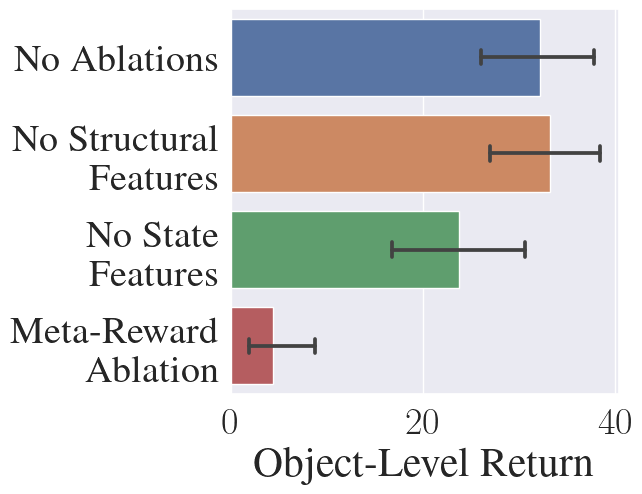

reformatted figures/ablation_study/code.py

All done! ✨ 🍰 ✨
1 file reformatted.


In [8]:
def get_ablation_data():
    return pd.concat([
        load_eval_df('outputs/eval/procgen/ablation/2023-12-13-12-56-19'),
        load_eval_df('outputs/eval/procgen/ablation/2023-12-12-20-07-56'),
        load_eval_df('outputs/eval/procgen/ablation/2023-12-12-20-54-56'),
        load_eval_df('outputs/eval/procgen/ablation/2023-12-13-12-29-13'),
    ]).reset_index()


def create_ablation_fig(abalation_df):
    plt.rcParams['text.latex.preamble'] = r"\usepackage{times}"
    sns.set(font_scale=2.5, rc={
        'font.family':'serif',
        "text.usetex": True,
        # 'font.size': 20,
        'savefig.facecolor': 'white',
    })

    _, ax = plt.subplots(figsize=(5, 5))

    # colours = [
    #     sns.color_palette()[-3],
    #     sns.color_palette()[0],
    #     sns.color_palette()[0],
    #     sns.color_palette()[0],
    # ]
    sns.barplot(data=abalation_df,
                y='Meta-level Policy',
                x='Return',
                # color=colours,
                ax=ax,
                orient='h',
                capsize=0.15)
    plt.xlabel('Object-Level Return')
    # plt.xlabel('')
    # ax.set_xticklabels([])
    plt.ylabel('')


from reproducible_figures import save_reproducible_figure

save_reproducible_figure(
    'ablation_study',
    get_ablation_data(),
    create_ablation_fig,
    show=True,
)

In [3]:
# stop tensorflow from accessing the GPU

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [4]:
from rlts.eval.procgen_rlts import load_runs

runs = load_runs(env='bigfish', percentiles=0.1)

/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


pygame 2.1.3 (SDL 2.0.22, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html
Using TensorFlow 2.12.0
Failed to get run info from WandB API:  Could not find run <Run drcope/rlts/zbrgnhev (not found)>
Loading most recent meta policy
Loading meta policy from checkpoint: outputs/runs/ppo_run_06-55-11-09-05-2023/network_checkpoints/step_81


2024-01-14 17:28:22.604558: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-01-14 17:28:22.604610: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: ee85dabf04c6
2024-01-14 17:28:22.604625: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: ee85dabf04c6
2024-01-14 17:28:22.604753: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2024-01-14 17:28:22.604779: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.104.12


In [5]:
from rlts.train.procgen_meta import create_batched_procgen_meta_envs, load_pretrained_q_network

from typing import List, Optional


def compute_importance_scores(run: dict) -> List[tuple]:
    """
    
    """

    meta_config = run['run_args']

    object_config = load_pretrained_q_network(
        folder=meta_config['pretrained_runs_folder'],
        run=meta_config['pretrained_run'],
        percentile=meta_config['pretrained_percentile'],
        verbose=False
    )

    policy = run['best_policy']
    first_layer_weight_matrix = policy._actor_network.variables[0].numpy()
    importance_vals = np.abs(first_layer_weight_matrix.mean(axis=1))

    env = create_batched_procgen_meta_envs(1, object_config=object_config)
    tree_tokeniser = env.envs[0].tree_tokeniser
    labels = tree_tokeniser.get_token_labels()

    sorted_labels = sorted(zip(labels, importance_vals),
                           key=lambda x: x[1],
                           reverse=True)

    return sorted_labels


def compute_grouped_importance_scores(ungrouped_scores: List[tuple],
                                      groups: Optional[List[tuple]] = None,
                                      take_max: bool = True) -> tuple:
    """
    
    """
    groups = groups or ['parent_id', 'id', 'action', 'state']

    ungrouped = [
        label for label, _ in ungrouped_scores
        if not any(group in label for group in groups)
    ]

    groups += ungrouped

    grouped_labels = []
    for group in groups:
        group_items = [
            (label, v) for label, v in ungrouped_scores
            if group in label
        ]
        if take_max:
            group_val = max([v for _, v in group_items])
        else:
            group_val = group_items
        grouped_labels.append((group, group_val))

    return sorted(grouped_labels, key=lambda x: x[1], reverse=True)

In [6]:
run = runs[0.1]

ungrouped_scores = compute_importance_scores(run)
grouped_scores = compute_grouped_importance_scores(ungrouped_scores)

TypeError: list indices must be integers or slices, not float

In [2]:
def plot_grouped_importance_scores(grouped_scores: List[tuple], ax = None):

    importance_data = pd.DataFrame(grouped_scores, columns=['Features', 'Importance'])

    pretty_labels = {
        'parent_id': 'Parent ID Features',
        'id': 'ID Features',
        'action': 'Action Features',
        'state': 'State Features',
        'exp_root_return': 'Expected Reward from Root',
        'exp_value': 'Expected Value at Node State',
        'path_return': 'Sum of Rewards to Node',
        'reward': 'Reward at Node',
        'meta_cost_of_computation': 'Cost of Computation',
    }

    importance_data = importance_data[importance_data['Features'].isin(pretty_labels.keys())]
    importance_data['Features'] = importance_data['Features'].apply(pretty_labels.get)

    sns.set(font_scale=2.5)
    plt.rcParams.update({
        'font.family':'serif',
        "text.usetex": True,
        'savefig.facecolor': 'white',
    })

    sns.barplot(data=importance_data,
                x='Importance',
                y='Features',
                capsize=0.15,
                ax=ax)

    if ax is None:
        plt.show()

Failed to get run info from WandB API:  Could not find run <Run drcope/rlts/zbrgnhev (not found)>
Failed to get run info from WandB API:  Could not find run <Run drcope/rlts/yacr8ual (not found)>
Failed to get run info from WandB API:  Could not find run <Run drcope/rlts/hmzkqjra (not found)>
Failed to get run info from WandB API:  Could not find run <Run drcope/rlts/3pf9ejd7 (not found)>
Failed to get run info from WandB API:  Could not find run <Run drcope/rlts/fh62vnka (not found)>


Loading most recent meta policy
Loading meta policy from checkpoint: outputs/runs/ppo_run_06-55-11-09-05-2023/network_checkpoints/step_81


Loading best meta policy for run bigfish-tree-256-percentile-0.75
Loading meta policy from checkpoint: outputs/runs/ppo_run_2023-11-19-23-13-50/network_checkpoints/step_435


Loading most recent meta policy
Loading meta policy from checkpoint: outputs/runs/ppo_run_15-48-02-12-05-2023/network_checkpoints/step_1985


Loading most recent meta policy
Loading meta policy from checkpoint: outputs/runs/ppo_run_52-06-02-13-05-2023/network_checkpoints/step_885


Loading most recent meta policy
Loading meta policy from checkpoint: outputs/runs/ppo_run_2023-05-15-07-39-48/network_checkpoints/step_2000


Loading most recent meta policy
Loading meta policy from checkpoint: outputs/runs/ppo_run_2023-05-15-17-52-00/network_checkpoints/step_2000


Loading best meta policy for run caveflyer-rlts-1
Loading meta policy from checkpoint: outputs/runs/ppo_run_2024-01-09-15-35-14/network_checkpoints/step_1526


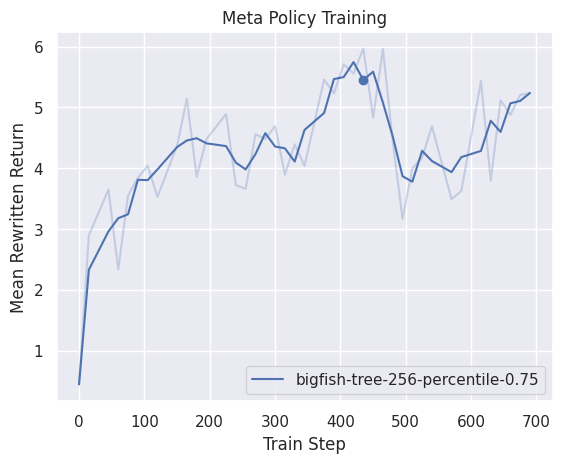

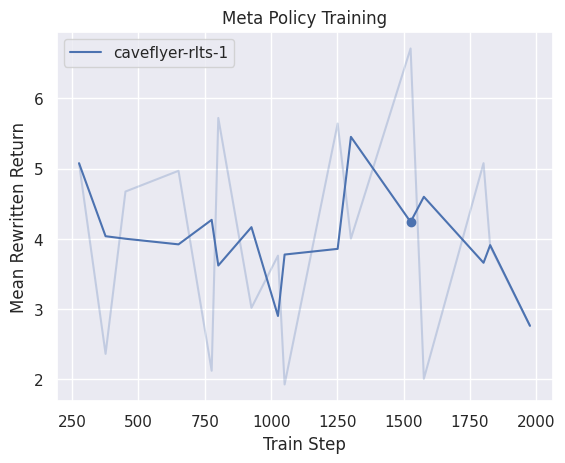

In [8]:
from rlts.eval.procgen_rlts import load_runs

runs = load_runs()

In [9]:
from collections import defaultdict


def get_mean_importance_scores(runs: List[dict]) -> List[tuple]:
    feature_scores = defaultdict(list)
    for run in runs:
        scores = compute_importance_scores(run)
        for label, score in scores:
            feature_scores[label].append(score)
    return [(label, np.mean(scores)) for label, scores in feature_scores.items()]


def get_importance_scores_df(runs: List[dict]) -> pd.DataFrame:
    items = []
    for run in runs:
        scores = compute_importance_scores(run)
        grouped_scores = compute_grouped_importance_scores(scores, take_max=False)
        for group, scores in grouped_scores:
            for feat_label, score in scores:
                items.append({
                    'run': run['run'],
                    'pretrained_percentile': run['run_args']['pretrained_percentile'],
                    'env': run['run_args']['object_level_config']['env'],
                    'group': group,
                    'feature': feat_label,
                    'score': score,
                })
    return pd.DataFrame(items)

In [10]:
importance_df = get_importance_scores_df(runs)

<Axes: xlabel='score', ylabel='group'>

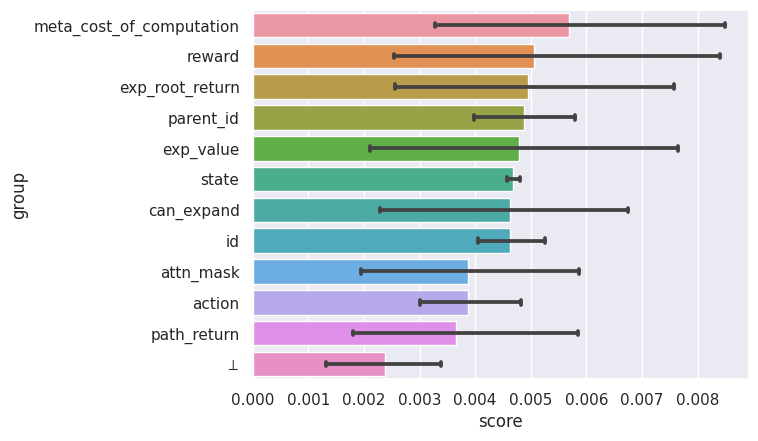

In [11]:
order = importance_df.groupby('group').mean().sort_values('score', ascending=False).index
sns.barplot(data=importance_df,
            x='score',
            y='group',
            # hue='group',
            order=order,
            capsize=0.15)

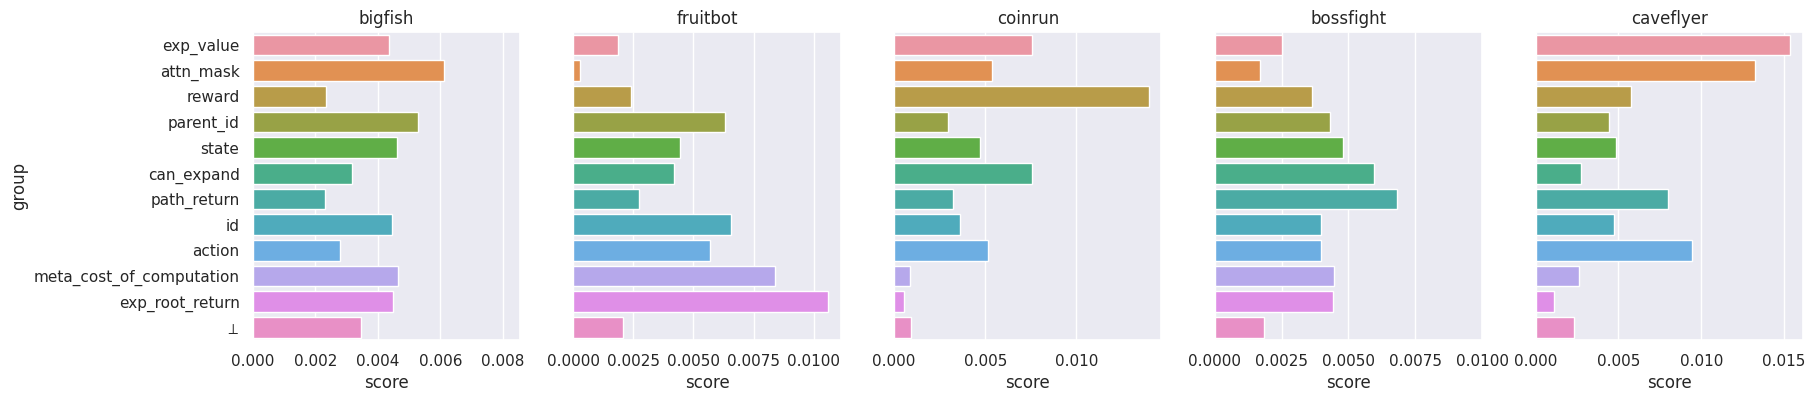

In [23]:
envs = importance_df.env.unique()
fig, ax = plt.subplots(1, len(envs), figsize=(len(envs) * 4, 4))
order = importance_df.groupby('group').mean().sort_values('score', ascending=False).index
for i, p in enumerate(envs):
    env_df = importance_df[importance_df.env == p]
    sns.barplot(data=env_df,
                x='score',
                y='group',
                # hue='group',
                order=order,
                # remove error bars
                errwidth=0,
                # capsize=0.15,
                ax=ax[i])
    ax[i].set_title(p)
    if i > 0:
        ax[i].set_ylabel('')
        ax[i].set_yticklabels([])

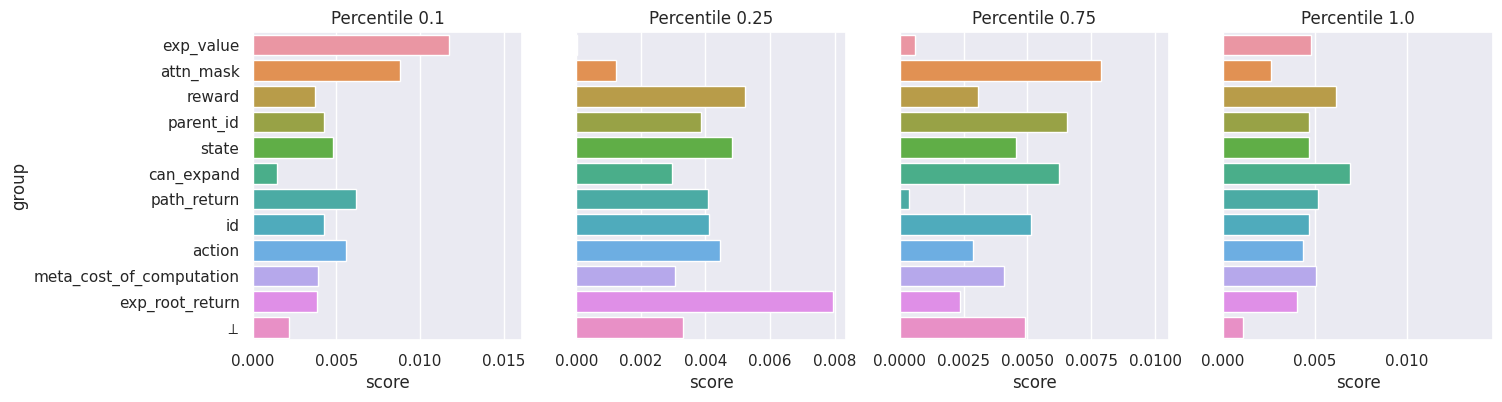

In [27]:
percentiles = importance_df.pretrained_percentile.unique()
fig, ax = plt.subplots(1, len(percentiles), figsize=(len(percentiles) * 4, 4))
order = importance_df.groupby('group').mean().sort_values('score', ascending=False).index
for i, p in enumerate(sorted(percentiles)):
    pretrained_percentile_df = importance_df[importance_df.pretrained_percentile == p]
    sns.barplot(data=pretrained_percentile_df,
                x='score',
                y='group',
                # hue='group',
                order=order,
                # remove error bars
                errwidth=0,
                # capsize=0.15,
                ax=ax[i])
    ax[i].set_title(f'Percentile {p}')
    if i > 0:
        ax[i].set_ylabel('')
        ax[i].set_yticklabels([])

In [7]:
ungrouped_scores = get_mean_importance_scores(runs)
grouped_scores = compute_grouped_importance_scores(ungrouped_scores)

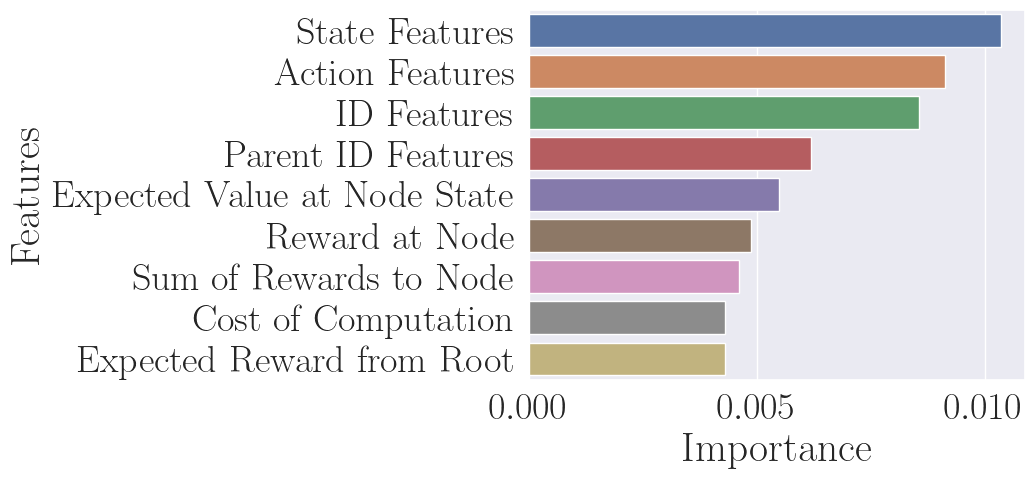

In [8]:
plot_grouped_importance_scores(grouped_scores)

In [13]:
sns.set(font_scale=2.5)
plt.rcParams.update({
    'font.family':'serif',
    "text.usetex": True,
    'savefig.facecolor': 'white',
})

items = []


for run in runs:
    ungrouped_scores = compute_importance_scores(run)
    grouped_scores = compute_grouped_importance_scores(ungrouped_scores)
    for group, score in grouped_scores:
        items.append({
            'run': run['run'],
            'pretrained_percentile': run['run_args']['pretrained_percentile'],
            'env': run['run_args']['object_level_config']['env'],
            'group': group,
            'score': score,
        })

max_importances_df = pd.DataFrame(items)

In [14]:
max_importances_df

,run,pretrained_percentile,env,group,score
0,None,0.1,bigfish,state,0.018735
1,None,0.1,bigfish,parent_id,0.009906
2,None,0.1,bigfish,id,0.009906
3,None,0.1,bigfish,exp_value,0.008143
4,None,0.1,bigfish,action,0.007578
...,...,...,...,...,...
79,<Run drcope/rlts/tbx2477d (finished)>,0.1,caveflyer,attn_mask,0.005833
80,<Run drcope/rlts/tbx2477d (finished)>,0.1,caveflyer,exp_root_return,0.005755
81,<Run drcope/rlts/tbx2477d (finished)>,0.1,caveflyer,$\perp$,0.003049
82,<Run drcope/rlts/tbx2477d (finished)>,0.1,caveflyer,can_expand,0.002359


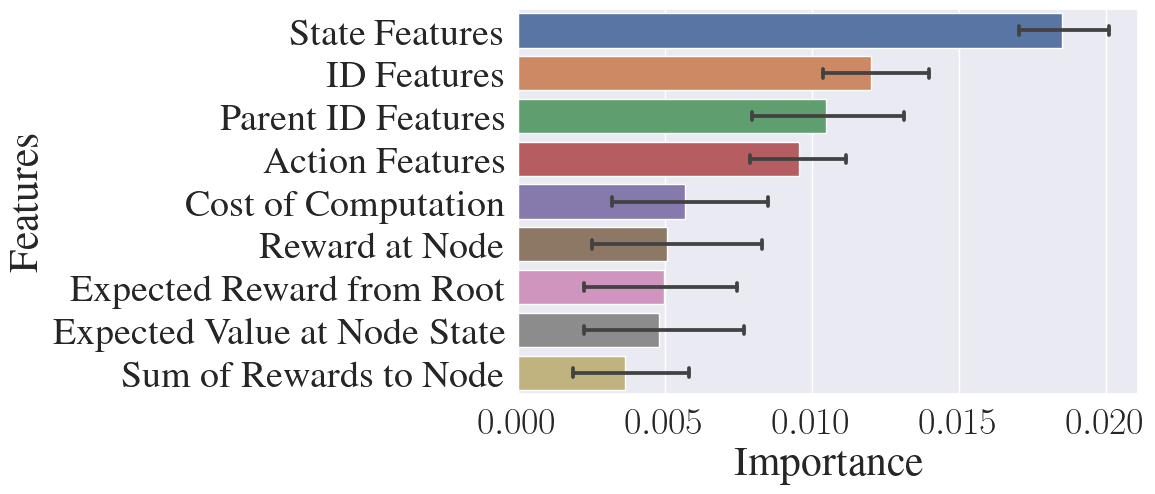

reformatted figures/feature_importances/code.py

All done! ✨ 🍰 ✨
1 file reformatted.


In [17]:
def create_importance_scores_fig(max_importances_df):

    plt.rcParams['text.latex.preamble'] = r"\usepackage{times}"
    sns.set(font_scale=2.5, rc={
        'font.family':'serif',
        "text.usetex": True,
        # 'font.size': 20,
        'savefig.facecolor': 'white',
    })

    pretty_labels = {
        'parent_id': 'Parent ID Features',
        'id': 'ID Features',
        'action': 'Action Features',
        'state': 'State Features',
        'exp_root_return': 'Expected Reward from Root',
        'exp_value': 'Expected Value at Node State',
        'path_return': 'Sum of Rewards to Node',
        'reward': 'Reward at Node',
        'meta_cost_of_computation': 'Cost of Computation',
    }

    # max_importances_df = max_importances_df[max_importances_df['group'].isin(pretty_labels.keys())]
    max_importances_df['Features'] = max_importances_df['group'].apply(pretty_labels.get)

    order = max_importances_df.groupby('Features').mean().sort_values('score', ascending=False).index
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(data=max_importances_df,
                    x='score',
                    y='Features',
                    order=order,
                    capsize=0.2)
    ax.set_xlabel('Importance')


from reproducible_figures import save_reproducible_figure

save_reproducible_figure(
    'feature_importances',
    max_importances_df,
    create_importance_scores_fig,
    show=True,
)

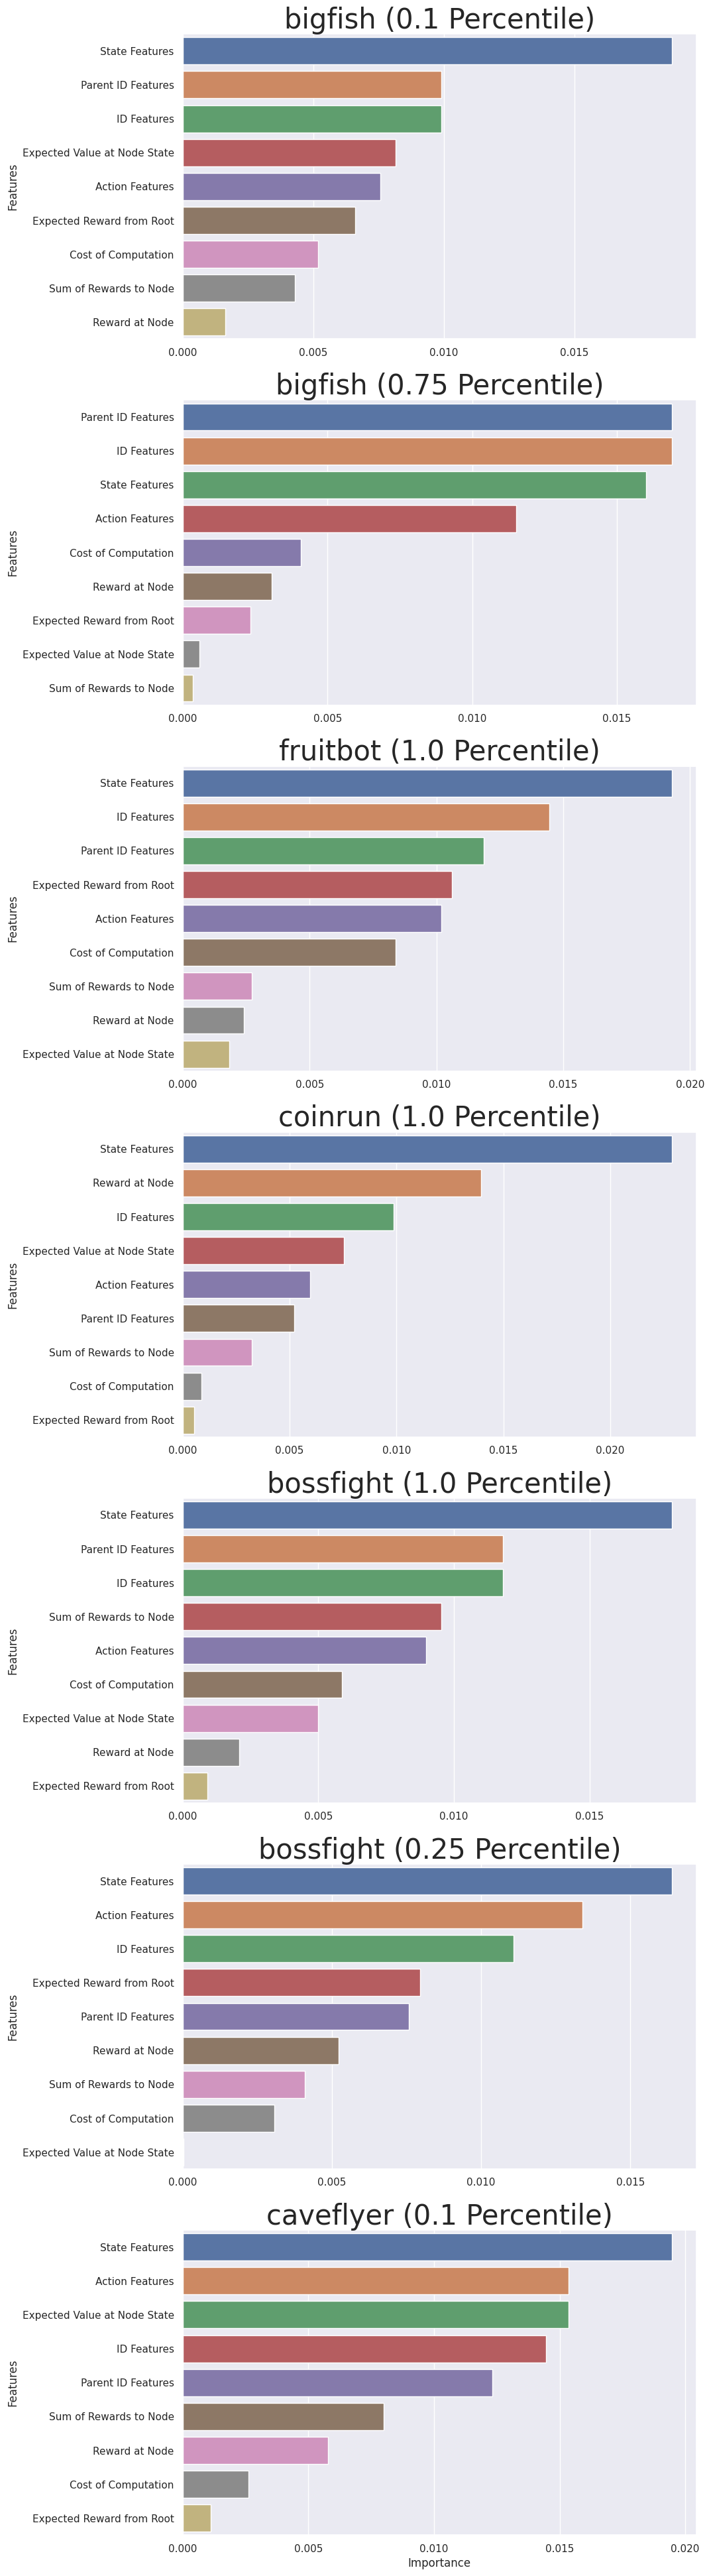

In [28]:
fig, axs = plt.subplots(len(runs), 1, figsize=(10, 7 * len(runs)))

for run, ax in zip(runs, axs):
    ungrouped_scores = compute_importance_scores(run)
    grouped_scores = compute_grouped_importance_scores(ungrouped_scores)
    plot_grouped_importance_scores(grouped_scores, ax=ax)
    p = run['run_args']['object_level_config']['env']
    percentile = run['run_args']['pretrained_percentile']
    ax.set_title(f'{p} ({percentile} Percentile)')
    if ax is not axs[-1]:
        ax.set_xlabel('')

In [18]:
from json import load
from logging import config


def normalise(x):
    return (x - x.min()) / (x.max() - x.min())


def get_bigfish_df(all_quantiles=False):
    episodes_df = pd.concat([
        load_eval_df('outputs/baseline/procgen/bigfish'),
        *[load_eval_df(str(p)) for p in Path('outputs/eval/procgen/bigfish').glob('*.csv')]
    ]).reset_index()

    if not all_quantiles:
        episodes_df = episodes_df[episodes_df['Pretrained Percentile'] == 0.25]
  
    # steps, and therefore returns, were accidentally multiplied returns by 4
    # when recorded, due to an bug regarding action repeating, so we correct for that.
    episodes_df['Number of Steps'] = episodes_df['Number of Steps'] / 4.0
    episodes_df['Return'] = episodes_df['Return'] / 4.0

    episodes_df['Normalized Return'] = normalise(episodes_df['Return'])
    
    policy_labels = get_policy_labels()
    policy_order = {policy: i for i, policy in enumerate(policy_labels.values())}
    episodes_df.sort_values(by='Meta-level Policy', inplace=True, 
                            key=lambda x: x.map(policy_order))
    

    episodes_df['Environment'] = 'BigFish'

    return episodes_df


def get_coinrun_df():
    episodes_df = pd.concat([
        load_eval_df('outputs/eval/procgen/coinrun/2023-05-14-17-48-16'),
        load_eval_df('outputs/eval/procgen/coinrun/2023-05-14-19-12-11'),
        load_eval_df('outputs/eval/procgen/coinrun/2023-05-14-19-35-37'),
        load_eval_df('outputs/baseline/procgen/2023-05-14-16-52-10'),
        load_eval_df('outputs/baseline/procgen/2023-05-15-09-02-50'),
        load_eval_df('outputs/baseline/procgen/2023-05-15-09-10-34'),
    ]).reset_index()
    episodes_df['Environment'] = 'CoinRun'

    episodes_df['Normalized Return'] = normalise(episodes_df['Return'])

    episodes_df = episodes_df[episodes_df['Number of Steps'] < 100]
    episodes_df = episodes_df[episodes_df['Pretrained Percentile'] == 1.0]

    return episodes_df


def get_fruitbot_df():
    episodes_df = pd.concat([
        load_eval_df('outputs/eval/procgen/fruitbot/2023-05-16-12-23-07'),
        load_eval_df('outputs/baseline/procgen/2023-05-16-12-56-10')
    ]).reset_index()
    episodes_df['Environment'] = 'FruitBot'

    episodes_df['Normalized Return'] = normalise(episodes_df['Return'])

    return episodes_df


def get_bossfight_df():
    episodes_df = pd.concat([
        load_eval_df('outputs/eval/procgen/bossfight/2023-05-16-11-01-24'),
        load_eval_df('outputs/baseline/procgen/2023-05-15-14-21-17'),
        load_eval_df('outputs/baseline/procgen/2023-05-16-11-46-05')
    ]).reset_index()
    episodes_df['Environment'] = 'BossFight'

    episodes_df['Normalized Return'] = normalise(episodes_df['Return'])
    episodes_df = episodes_df[episodes_df['Pretrained Percentile'] == 0.25]

    return episodes_df



def get_caveflyer_df():
    episodes_df = pd.concat([
        load_eval_df('outputs/eval/procgen/caveflyer/2024-01-11-20-13-06'),
        load_eval_df('outputs/baseline/procgen/caveflyer/2024-01-11-20-21-07'),
    ]).reset_index()
    episodes_df['Environment'] = 'CaveFlyer'

    episodes_df['Normalized Return'] = normalise(episodes_df['Return'])
    episodes_df = episodes_df[episodes_df['Pretrained Percentile'] == .1]

    return episodes_df


def get_all_envs_df():
    return pd.concat([
         get_bigfish_df(), get_coinrun_df(), get_fruitbot_df(),
         get_bossfight_df(), get_caveflyer_df()
    ])

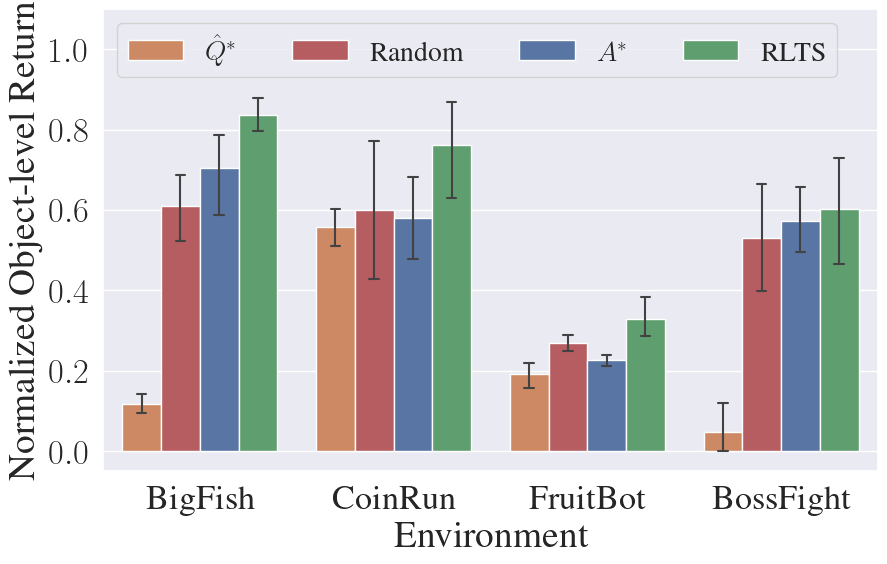

reformatted figures/procgen_all_envs/code.py

All done! ✨ 🍰 ✨
1 file reformatted.


In [74]:
# sns.set(font_scale=1)
# sns.set()
# sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
plt.rcParams.update({
    'font.family':'serif',
    "text.usetex": True,
    # 'font.size': 20,
    # 'axes.labelsize': 18, 'axes.titlesize': 20, 
    'savefig.facecolor': 'white',
})

# Set the default text font size
plt.rc('font', size=16)
# Set the axes title font size
plt.rc('axes', titlesize=16)
# Set the axes labels font size
plt.rc('axes', labelsize=16)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=16)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=16)
# Set the legend font size
plt.rc('legend', fontsize=15)
# Set the font size of the figure title
plt.rc('figure', titlesize=20)

episodes_df = get_all_envs_df()


def create_all_envs_fig(episodes_df):
    set_plotting_style(font_scale=2.25)
    plt.figure(figsize=(10, 6))

    pallete = sns.color_palette()
    policy_pallete = [pallete[1], pallete[3], pallete[0], pallete[2]]

    policy_labels = {
        k: v for k, v in get_policy_labels().items()
        if v in episodes_df['Meta-level Policy'].unique()
    }

    ax = sns.barplot(data=episodes_df,
                     x='Environment', y='Normalized Return',
                     hue='Meta-level Policy',
                     hue_order=policy_labels.values(),
                     palette=policy_pallete,
                     capsize=0.05,
                     errwidth=1.5)

    ax.set_ylim([-0.05, 1.1])

    plt.ylabel('Normalized Object-level Return')

    ax.legend(ncol=episodes_df.Environment.nunique(),
              loc='upper left', fontsize=20)

    # plt.savefig('figures/procgen_all_envs.pdf', bbox_inches='tight')
    # plt.show()

    # ax = sns.barplot(data=episodes_df, x='Environment', y='Number of Steps', hue='Meta-level Policy',
    #                  hue_order=policy_labels.values(), palette=policy_pallete, errwidth=1.5)


    # plt.figure(figsize=(12, 5))
    # ax = sns.boxplot(data=episodes_df,
    #                 x='Environment', y='Normalized Return',
    #                 hue='Meta-level Policy',
    #                 hue_order=policy_labels.values(),
    #                 palette=policy_pallete)

    # ax.set_ylim([-0.05, 1.3])
    # ax.legend(ncol=episodes_df.Environment.nunique(), loc='upper left', fontsize=15)
# plt.savefig('figures/procgen_all_envs_boxplot.pdf', bbox_inches='tight')
# plt.show()
    
from reproducible_figures import save_reproducible_figure

episodes_df = episodes_df[episodes_df.Environment != 'CaveFlyer']
save_reproducible_figure(
    'procgen_all_envs',
    episodes_df,
    create_all_envs_fig,
    show=True,
)

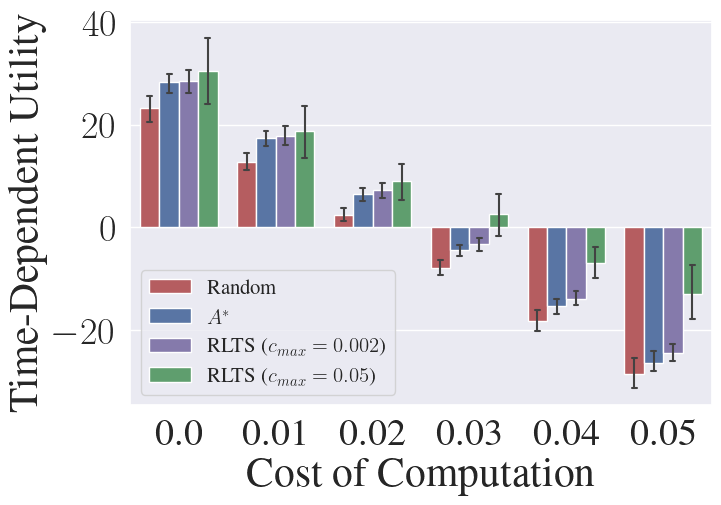

reformatted figures/bigfish-tdu-vs-cost/code.py

All done! ✨ 🍰 ✨
1 file reformatted.


In [29]:
# plt.rcParams.update({
#     'font.family':'serif',
#     "text.usetex": True,
#     'savefig.facecolor': 'white',
# })

# plt.rc('font', size=16)
# plt.rc('axes', titlesize=16)
# plt.rc('axes', labelsize=16)
# plt.rc('xtick', labelsize=16)
# plt.rc('ytick', labelsize=16)
# plt.rc('legend', fontsize=18)
# plt.rc('figure', titlesize=20)


# sns.set(font_scale=2.5)
# plt.rcParams.update({
#     'font.family':'serif',
#     "text.usetex": True,
#     # 'font.size': 20,
#     # 'axes.labelsize': 18, 'axes.titlesize': 20, 
#     'savefig.facecolor': 'white',
# })



episodes_df = get_bigfish_df(all_quantiles=True)
episodes_df = episodes_df[episodes_df['Pretrained Percentile'] == 0.75]

# rlts_zero_cost = episodes_df[episodes_df['Meta-level Policy'] == 'RLTS']['Return']
# rlts_zero_cost['cost_of_computation'] = 0.0
# rlts_zero_cost['n_computations'] = episodes_df['Number of Steps'] * 16

episodes_df['Meta-level Policy'] = episodes_df['Meta-level Policy'].apply(lambda x: 'RLTS ($c_{max}=0.002$)' if x == 'RLTS' else x)

episodes_df = episodes_df[episodes_df['Meta-level Policy'].isin(['Random', '$A^*$', 'RLTS ($c_{max}=0.002$)'])]

rlts_cost_df = pd.concat([
    load_eval_df('outputs/eval/procgen/cost/2023-05-16-18-56-59'),
    load_eval_df('outputs/eval/procgen/cost/2023-05-16-20-00-48'),
    # rlts_zero_cost
]).reset_index()
rlts_cost_df['Time-Dependent Utility'] = rlts_cost_df['Return'] - rlts_cost_df['n_computations'] * rlts_cost_df['cost_of_computation']
rlts_cost_df['Meta-level Policy'] = 'RLTS'
# rlts_cost_df = rlts_cost_df[rlts_cost_df['cost_of_computation'] <= 0.05]
rlts_cost_df = rlts_cost_df[rlts_cost_df['cost_of_computation'].isin([0., .01, .02, .03, .04, .05])]

def adjust_returns_by_cost(cost_of_computation: float):
    df = episodes_df.copy()
    # total_computational_cost wasn't recorded for these policies, but we can calculate it here
    # as Random and A* policies always do 9 computational steps per object-level step
    df['n_computations'] = episodes_df['Number of Steps'] * 9
    df['Time-Dependent Utility'] = episodes_df['Return'] - cost_of_computation * df['n_computations']
    df['cost_of_computation'] = cost_of_computation
    return df

episodes_df = pd.concat([
    adjust_returns_by_cost(cost_of_computation)
    for cost_of_computation in rlts_cost_df['cost_of_computation'].unique()
])

tdu_df = pd.concat([rlts_cost_df, episodes_df]).reset_index()

def create_cost_of_computation_fig(tdu_df):
    pallete = sns.color_palette()
    policy_pallete = [pallete[3], pallete[0], pallete[4], pallete[2]]

    # policy_labels = get_policy_labels()

    # hue_order = [
    #     policy for policy in policy_labels.values() if policy in tdu_df['Meta-level Policy'].unique()
    # ] + ['RLTS (No Cost)']
    # hue_order = [hue_order[0], hue_order[1], hue_order[3], hue_order[2]]

    hue_order = ['Random', '$A^*$', 'RLTS ($c_{max}=0.002$)', 'RLTS ($c_{max}=0.05$)']
    tdu_df['Meta-level Policy'] = tdu_df['Meta-level Policy'].apply(lambda x: 'RLTS ($c_{max}=0.05$)' if x == 'RLTS' else x)

    set_plotting_style(font_scale=2.5)

    plt.figure(figsize=(15/2, 5))
    ax = sns.barplot(
        data=tdu_df,
        x='cost_of_computation', y='Time-Dependent Utility',
        hue='Meta-level Policy',
        hue_order=hue_order, palette=policy_pallete,
        errwidth=1.5, capsize=0.05
    )
    # tdu_df.to_csv('figures/data/bigfish-tdu.csv', index=False)
    ax.legend(fontsize=15, loc='lower left')
    ax.set_xlabel('Cost of Computation')
# plt.savefig('figures/bigfish-tdu-vs-cost.pdf', bbox_inches='tight')
# plt.show()


# plt.figure(figsize=(15/2, 8/2))
# ax = sns.barplot(
#     data=tdu_df[tdu_df['Meta-level Policy'] == 'RLTS ($c_{max}=0.05$)'], x='cost_of_computation', y='Return', hue='Meta-level Policy',
#     palette=[policy_pallete[2]], errwidth=1
# )

# ax.set_xlim([-.75, tdu_df.cost_of_computation.nunique() - 0.25])
# ax.hlines(tdu_df[tdu_df['Meta-level Policy'] == '$A^*$']['Return'].mean(), -1, tdu_df.cost_of_computation.nunique(),
#           linestyles='dashed', colors=policy_pallete[1], label='$A^*$')
# ax.hlines(tdu_df[tdu_df['Meta-level Policy'] == 'Random']['Return'].mean(), -1, tdu_df.cost_of_computation.nunique(),
#           linestyles='dashed', colors=policy_pallete[0], label='Random')

# ax.legend(fontsize=15, loc='lower left')
# ax.set_xlabel('Cost of Computation')
# ax.set_ylabel('Object-level Return')
# tdu_df.to_csv('figures/data/bigfish-return-vs-cost.csv', index=False)
# plt.savefig('figures/bigfish-return-vs-cost.pdf', bbox_inches='tight')
# plt.show()

from reproducible_figures import save_reproducible_figure

save_reproducible_figure(
    'bigfish-tdu-vs-cost',
    tdu_df,
    create_cost_of_computation_fig,
    show=True,
)

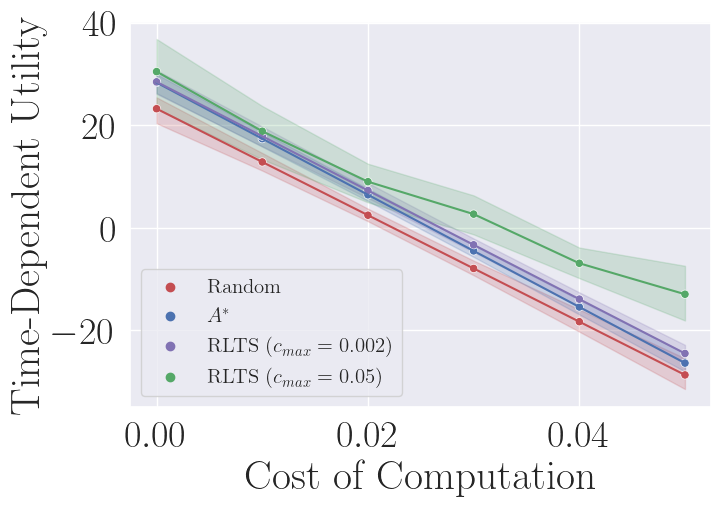

In [87]:
# plt.rcParams.update({
#     'font.family':'serif',
#     "text.usetex": True,
#     'savefig.facecolor': 'white',
# })

# plt.rc('font', size=16)
# plt.rc('axes', titlesize=16)
# plt.rc('axes', labelsize=16)
# plt.rc('xtick', labelsize=16)
# plt.rc('ytick', labelsize=16)
# plt.rc('legend', fontsize=18)
# plt.rc('figure', titlesize=20)


sns.set(font_scale=2.5)
plt.rcParams.update({
    'font.family':'serif',
    "text.usetex": True,
    # 'font.size': 20,
    # 'axes.labelsize': 18, 'axes.titlesize': 20, 
    'savefig.facecolor': 'white',
})



episodes_df = get_bigfish_df(all_quantiles=True)
episodes_df = episodes_df[episodes_df['Pretrained Percentile'] == 0.75]

# rlts_zero_cost = episodes_df[episodes_df['Meta-level Policy'] == 'RLTS']['Return']
# rlts_zero_cost['cost_of_computation'] = 0.0
# rlts_zero_cost['n_computations'] = episodes_df['Number of Steps'] * 16

episodes_df['Meta-level Policy'] = episodes_df['Meta-level Policy'].apply(lambda x: 'RLTS ($c_{max}=0.002$)' if x == 'RLTS' else x)

episodes_df = episodes_df[episodes_df['Meta-level Policy'].isin(['Random', '$A^*$', 'RLTS ($c_{max}=0.002$)'])]

rlts_cost_df = pd.concat([
    load_eval_df('outputs/eval/procgen/cost/2023-05-16-18-56-59'),
    load_eval_df('outputs/eval/procgen/cost/2023-05-16-20-00-48'),
    # rlts_zero_cost
]).reset_index()
rlts_cost_df['Time-Dependent Utility'] = rlts_cost_df['Return'] - rlts_cost_df['n_computations'] * rlts_cost_df['cost_of_computation']
rlts_cost_df['Meta-level Policy'] = 'RLTS'
# rlts_cost_df = rlts_cost_df[rlts_cost_df['cost_of_computation'] <= 0.05]
rlts_cost_df = rlts_cost_df[rlts_cost_df['cost_of_computation'].isin([0., .01, .02, .03, .04, .05])]

def adjust_returns_by_cost(cost_of_computation: float):
    df = episodes_df.copy()
    # total_computational_cost wasn't recorded for these policies, but we can calculate it here
    # as Random and A* policies always do 9 computational steps per object-level step
    df['n_computations'] = episodes_df['Number of Steps'] * 9
    df['Time-Dependent Utility'] = episodes_df['Return'] - cost_of_computation * df['n_computations']
    df['cost_of_computation'] = cost_of_computation
    return df

episodes_df = pd.concat([
    adjust_returns_by_cost(cost_of_computation)
    for cost_of_computation in rlts_cost_df['cost_of_computation'].unique()
])

tdu_df = pd.concat([rlts_cost_df, episodes_df]).reset_index()

pallete = sns.color_palette()
policy_pallete = [pallete[3], pallete[0], pallete[4], pallete[2]]

policy_labels = get_policy_labels()

# hue_order = [
#     policy for policy in policy_labels.values() if policy in tdu_df['Meta-level Policy'].unique()
# ] + ['RLTS (No Cost)']
# hue_order = [hue_order[0], hue_order[1], hue_order[3], hue_order[2]]

hue_order = ['Random', '$A^*$', 'RLTS ($c_{max}=0.002$)', 'RLTS ($c_{max}=0.05$)']
tdu_df['Meta-level Policy'] = tdu_df['Meta-level Policy'].apply(lambda x: 'RLTS ($c_{max}=0.05$)' if x == 'RLTS' else x)

plt.figure(figsize=(15/2, 5))
ax = sns.lineplot(
    data=tdu_df,
    x='cost_of_computation', y='Time-Dependent Utility',
    hue='Meta-level Policy',
    hue_order=hue_order, palette=policy_pallete,
    legend=False,
)
ax = sns.scatterplot(
    data=tdu_df.groupby(['cost_of_computation', 'Meta-level Policy']).mean().reset_index(),
    x='cost_of_computation', y='Time-Dependent Utility',
    hue='Meta-level Policy',
    hue_order=hue_order, palette=policy_pallete,
    # errwidth=1, capsize=0.05,
    ax=ax
)

# ax = sns.pointplot(
#     data=tdu_df,
#     x='cost_of_computation', y='Time-Dependent Utility',
#     hue='Meta-level Policy',
#     hue_order=hue_order, palette=policy_pallete,
#     errwidth=1, capsize=0.05,
#     ax=ax
# )
# tdu_df.to_csv('figures/data/bigfish-tdu.csv', index=False)
ax.legend(fontsize=15, loc='lower left')
ax.set_xlabel('Cost of Computation')
plt.savefig('figures/bigfish-tdu-vs-cost-lineplot.pdf', bbox_inches='tight')
plt.show()


# plt.figure(figsize=(15/2, 8/2))
# ax = sns.barplot(
#     data=tdu_df[tdu_df['Meta-level Policy'] == 'RLTS ($c_{max}=0.05$)'], x='cost_of_computation', y='Return', hue='Meta-level Policy',
#     palette=[policy_pallete[2]], errwidth=1
# )

# ax.set_xlim([-.75, tdu_df.cost_of_computation.nunique() - 0.25])
# ax.hlines(tdu_df[tdu_df['Meta-level Policy'] == '$A^*$']['Return'].mean(), -1, tdu_df.cost_of_computation.nunique(),
#           linestyles='dashed', colors=policy_pallete[1], label='$A^*$')
# ax.hlines(tdu_df[tdu_df['Meta-level Policy'] == 'Random']['Return'].mean(), -1, tdu_df.cost_of_computation.nunique(),
#           linestyles='dashed', colors=policy_pallete[0], label='Random')

# ax.legend(fontsize=15, loc='lower left')
# ax.set_xlabel('Cost of Computation')
# ax.set_ylabel('Object-level Return')
# tdu_df.to_csv('figures/data/bigfish-return-vs-cost.csv', index=False)
# plt.savefig('figures/bigfish-return-vs-cost.pdf', bbox_inches='tight')
# plt.show()

In [28]:
tdu_df[(tdu_df['Meta-level Policy'] == 'Random') & (tdu_df['cost_of_computation'] == 0.05)][['Return', 'n_computations']].describe()

,Return,n_computations
count,24.00000,24.000000
mean,23.21875,1037.718750
std,6.43965,251.055763
min,0.75000,108.000000
25%,22.31250,1125.000000
50%,24.00000,1125.000000
75%,25.62500,1125.000000
max,35.25000,1125.000000


In [29]:
tdu_df[(tdu_df['Meta-level Policy'] == 'RLTS ($c_{max}=0.05$)') & (tdu_df['cost_of_computation'] == 0.05)][['Return', 'n_computations']].describe()

,Return,n_computations
count,20.000000,20.000000
mean,24.750000,753.750000
std,14.775068,434.238338
min,2.000000,8.000000
25%,11.000000,520.500000
50%,19.500000,837.500000
75%,40.000000,1097.750000
max,40.000000,1327.000000


In [32]:
1 - 753.750000 / 1037.718750

0.27364712259463364

In [34]:
episodes_df.groupby(['Meta-level Policy', 'Environment'])['Normalized Return'].describe()

count      mean       std       min       25%  \
Meta-level Policy Environment                                                  
$A^*$             BigFish       17.0  0.704604  0.217671  0.000000  0.710145   
                  BossFight     90.0  0.573333  0.391265  0.000000  0.066667   
                  CoinRun       88.0  0.579545  0.496461  0.000000  0.000000   
                  FruitBot      44.0  0.227273  0.046746  0.108108  0.216216   
$\hat{Q}^*$       BigFish      100.0  0.117681  0.123968  0.000000  0.028986   
                  BossFight     32.0  0.047917  0.180191  0.000000  0.000000   
                  CoinRun      434.0  0.557604  0.497244  0.000000  0.000000   
                  FruitBot      20.0  0.191892  0.073835  0.000000  0.216216   
RLTS              BigFish       20.0  0.837319  0.097801  0.673913  0.764493   
                  BossFight     32.0  0.602083  0.384086  0.000000  0.183333   
                  CoinRun       46.0  0.760870  0.431266  0.000000  1.000000   
                  FruitBot      32.0  0.327703  0.146714  0.162162  0.243243   
Random            BigFish       20.0  0.609420  0.196841  0.036232  0.505435   
                  BossFight     32.0  0.531250  0.403740  0.000000  0.050000   
                  CoinRun       35.0  0.600000  0.497050  0.000000  0.000000   
                  FruitBot      20.0  0.268919  0.043381  0.216216  0.243243   

                                    50%       75%       max  
Meta-level Policy Environment                                
$A^*$             BigFish      0.753623  0.804348  0.927536  
                  BossFight    0.733333  0.866667  1.000000  
                  CoinRun      1.000000  1.000000  1.000000  
                  FruitBot     0.229730  0.243243  0.324324  
$\hat{Q}^*$       BigFish      0.079710  0.152174  0.586957  
                  BossFight    0.000000  0.000000  0.733333  
                  CoinRun      1.000000  1.000000  1.000000  
                  FruitBot     0.216216  0.222973  0.243243  
RLTS              BigFish      0.847826  0.911232  1.000000  
                  BossFight    0.800000  0.933333  1.000000  
                  CoinRun      1.000000  1.000000  1.000000  
                  FruitBot     0.297297  0.351351  1.000000  
Random            BigFish      0.706522  0.739130  0.826087  
                  BossFight    0.733333  0.866667  1.000000  
                  CoinRun      1.000000  1.000000  1.000000  
                  FruitBot     0.256757  0.297297  0.351351

In [35]:
print(episodes_df.groupby(['Meta-level Policy', 'Environment'])['Normalized Return'].describe().to_latex())

'\\begin{tabular}{llrrrrrrrr}\n\\toprule\n       &          &  count &      mean &       std &       min &       25\\% &       50\\% &       75\\% &       max \\\\\nMeta-level Policy & Environment &        &           &           &           &           &           &           &           \\\\\n\\midrule\n\\$A\\textasciicircum *\\$ & BigFish &   17.0 &  0.704604 &  0.217671 &  0.000000 &  0.710145 &  0.753623 &  0.804348 &  0.927536 \\\\\n       & BossFight &   90.0 &  0.573333 &  0.391265 &  0.000000 &  0.066667 &  0.733333 &  0.866667 &  1.000000 \\\\\n       & CoinRun &   88.0 &  0.579545 &  0.496461 &  0.000000 &  0.000000 &  1.000000 &  1.000000 &  1.000000 \\\\\n       & FruitBot &   44.0 &  0.227273 &  0.046746 &  0.108108 &  0.216216 &  0.229730 &  0.243243 &  0.324324 \\\\\n\\$\\textbackslash hat\\{Q\\}\\textasciicircum *\\$ & BigFish &  100.0 &  0.117681 &  0.123968 &  0.000000 &  0.028986 &  0.079710 &  0.152174 &  0.586957 \\\\\n       & BossFight &   32.0 &  0.047917 &  0.

In [418]:
df = pd.concat([
    load_eval_df('outputs/eval/procgen/tree_size/2023-05-16-15-17-56/'),
    load_eval_df('outputs/eval/procgen/tree_size/2023-05-16-15-24-53/'),
    load_eval_df('outputs/eval/procgen/tree_size/2023-05-16-15-27-49/'),
])
for p in df.env.unique():
    df.loc[df.env == p, 'Normalized Return'] = normalise(df.loc[df.env == p, 'Return'])

df = df[~((df.env == 'coinrun') & (df['Number of Steps'] > 100))]

df_64 = get_all_envs_df()
df_64 = df_64[df_64['Meta-level Policy'] != '$\hat{Q}^*$']
df_64['env'] = df_64['Environment'].apply(lambda x: x.lower())
df = pd.concat([df, df_64])
df = df.reset_index()

In [424]:
# n_envs = len(df.env.unique())
# fig, axs = plt.subplots(1, n_envs, figsize=(6 * n_envs, 5))

# pallete = sns.color_palette()
# policy_pallete = [pallete[3], pallete[0], pallete[2]]

# policy_labels = get_policy_labels()

# for i, (ax, env) in enumerate(zip(axs, df.env.unique())):
#     ax = sns.barplot(data=df[df.env == env], x='max_tree_size', y='Normalized Return', hue='Meta-level Policy',
#                      palette=policy_pallete, errwidth=1.5, ax=ax)
#     # sns.lineplot(
#     #     data=df[df.env == env], x='max_tree_size', y='Normalized Return', hue='Meta-level Policy',
#     #     ax=ax, alpha=0.25
#     # )
#     # scatter_df = df[df.env == env].groupby(['max_tree_size', 'Meta-level Policy']).mean().reset_index()
#     # sns.scatterplot(data=scatter_df, x='max_tree_size', y='Normalized Return', hue='Meta-level Policy', ax=ax, legend=False)
#     if i == 0:
#         ax.legend(fontsize=14)
#     else:
#         ax.get_legend().remove()
#     ax.set_title(env)
# plt.show()

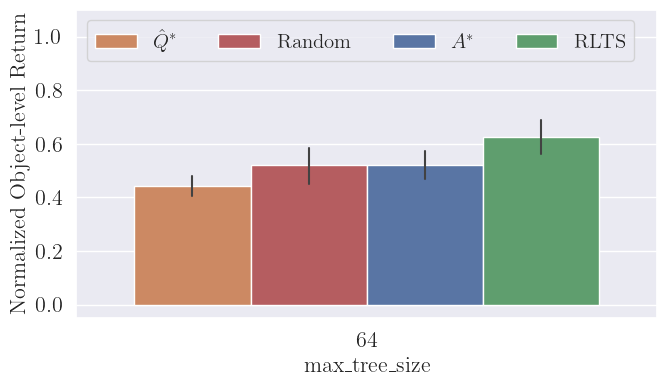

In [334]:
# sns.set(font_scale=1)
# sns.set()
# sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
plt.rcParams.update({
    'font.family':'serif',
    "text.usetex": True,
    # 'font.size': 20,
    # 'axes.labelsize': 18, 'axes.titlesize': 20, 
    'savefig.facecolor': 'white',
})

# Set the default text font size
plt.rc('font', size=16)
# Set the axes title font size
plt.rc('axes', titlesize=16)
# Set the axes labels font size
plt.rc('axes', labelsize=16)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=16)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=16)
# Set the legend font size
plt.rc('legend', fontsize=18)
# Set the font size of the figure title
plt.rc('figure', titlesize=20)

episodes_df = get_all_envs_df()

plt.figure(figsize=(15/2, 8/2))


policy_rank = ['Instant Terminate', 'Random', 'AStar', 'Learned Meta-Policy']
pallete = sns.color_palette()
policy_pallete = [pallete[1], pallete[3], pallete[0], pallete[2]]

policy_labels = get_policy_labels()
ax = sns.barplot(data=episodes_df, x='max_tree_size', y='Normalized Return', hue='Meta-level Policy',
                 hue_order=policy_labels.values(), palette=policy_pallete, errwidth=1.5)
ax.set_ylim([-0.05, 1.1])

plt.ylabel('Normalized Object-level Return')

ax.legend(ncols=4, loc='upper left', fontsize=15)

plt.show()

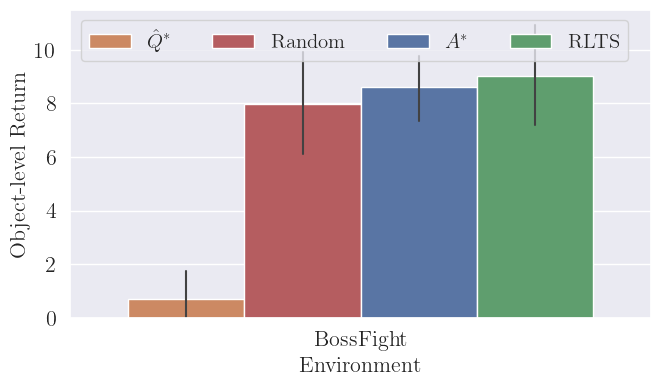

In [325]:
plt.figure(figsize=(15/2, 8/2))


policy_rank = ['Instant Terminate', 'Random', 'AStar', 'Learned Meta-Policy']
pallete = sns.color_palette()
policy_pallete = [pallete[1], pallete[3], pallete[0], pallete[2]]

policy_labels = get_policy_labels()
ax = sns.barplot(data=get_bossfight_df(), x='Environment', y='Return', hue='Meta-level Policy',
                 hue_order=policy_labels.values(), palette=policy_pallete, errwidth=1.5)
# ax = sns.boxplot(data=get_bossfight_df(), x='Meta-level Policy', y='Return')
# ax.set_ylim([0, 1.3])

plt.ylabel('Object-level Return')

# ax.set_ylim([-0.05, 1.1])
ax.legend(ncols=4, loc='upper left', fontsize=15)

plt.show()

In [73]:
get_bossfight_df().groupby('Meta-level Policy').mean()

,index,Run ID,Pretrained Percentile,Number of Steps,Return,Normalized Return
Meta-level Policy,,,,,,
$A^*$,149.358974,NaN,0.5,15.794872,0.00,0.000000
Random,53.500000,NaN,0.5,24.550000,0.65,0.059091


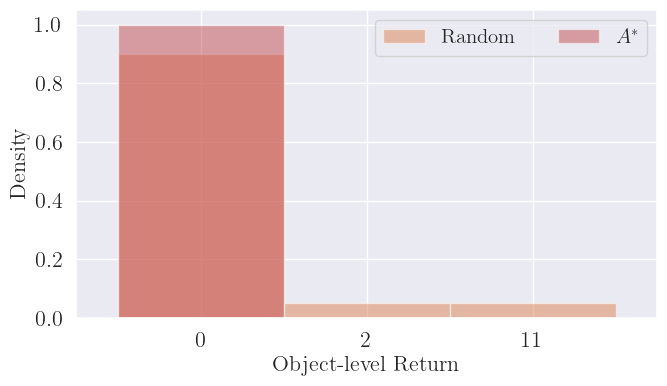

In [69]:
percentile = 0.5

# sns.set(font_scale=2.5)
# sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
plt.rcParams.update({
    'font.family':'serif',
    "text.usetex": True,
    # 'font.size': 20
})

# plt.figure(figsize=(15/2, 8/2))

episodes_df = get_bossfight_df()

n = 1
def round_return(x):
    return round(x / n) * n

episodes_df['Rounded Return'] = episodes_df['Return'].apply(round_return)
counts_df = episodes_df.groupby(['Meta-level Policy', 'Pretrained Percentile', 'Rounded Return']).count().reset_index()
counts_df.rename(columns={'Return': 'Count'}, inplace=True)
counts_df.drop(columns=['index', 'Number of Steps'], inplace=True)

total_episodes = episodes_df.groupby(['Meta-level Policy', 'Pretrained Percentile']).count().reset_index()
total_episodes.rename(columns={'index': 'Count'}, inplace=True)
total_episodes = total_episodes[['Meta-level Policy', 'Pretrained Percentile', 'Count']]


def normalize_counts(row):
    _, data = row
    right_policy = total_episodes['Meta-level Policy'] == data['Meta-level Policy']
    right_percentile = total_episodes['Pretrained Percentile'] == data['Pretrained Percentile']
    n = total_episodes[right_policy & right_percentile]['Count'].values[0]
    data['Density'] = data['Count'] / n
    return data

counts_df = pd.DataFrame(map(normalize_counts, counts_df.iterrows()))

fig, ax = plt.subplots(figsize=(15/2, 8/2))
df = counts_df[counts_df['Pretrained Percentile'] == percentile]
df['Return Interval'] = df['Rounded Return'].apply(lambda x: f'[{x}, {x + n})')
df.sort_values(by=['Rounded Return', 'Meta-level Policy'], inplace=True)
# df.set_index('Rounded Return', inplace=True)
# df = df[['Meta-level Policy', 'Density']]
# sns.barplot(data=df, x='Return Interval', y='Density', hue='Meta-level Policy', ax=ax, hue_order=policy_hue_order)
df = df.pivot(index='Rounded Return', columns='Meta-level Policy', values='Density').fillna(0)
pallete = sns.color_palette()
policy_pallete = [pallete[1], pallete[3], pallete[0], pallete[2]]
df = df[[col for col in policy_labels.values() if col in df.columns]] 

for policy, colour in zip(df.columns, policy_pallete):
    df[policy].plot.bar(ax=ax, color=colour, alpha=0.5, width=1, rot=0)
# ax.set_title(f'Pretrained Percentile: {percentile}')
# ax.set_xlim([0, 80])

ax.set_xlabel('Object-level Return')
ax.set_ylabel('Density')
# ax.legend(loc='upper left', fontsize=15)
# ax.legend(fontsize=15, bbox_to_anchor=(.6, .5))
ax.legend(fontsize=15, ncol=2)
# ax.set_ylim([0, 0.55])

# data at figures/data/bigfish/meta-policies-return-distributions.csv
# plt.savefig('figures/return-distributions-025.pdf', bbox_inches='tight')

plt.show()

In [28]:
episodes_df[(episodes_df['Environment'] == 'FruitBot') & (episodes_df['Pretrained Percentile'] == 0.1)]

,index,Run ID,Meta-level Policy,Pretrained Percentile,Number of Steps,Return,Normalized Return,Environment
261,0,NaN,Random,0.1,44,1.0,0.529412,FruitBot
262,1,NaN,Random,0.1,51,4.0,0.705882,FruitBot
263,2,NaN,Random,0.1,51,3.0,0.647059,FruitBot
264,3,NaN,Random,0.1,58,0.0,0.470588,FruitBot
265,4,NaN,Random,0.1,58,0.0,0.470588,FruitBot
...,...,...,...,...,...,...,...,...
404,143,NaN,Random,0.1,58,4.0,0.705882,FruitBot
405,144,NaN,Random,0.1,65,2.0,0.588235,FruitBot
406,145,NaN,Random,0.1,87,2.0,0.588235,FruitBot
407,146,NaN,Random,0.1,152,-1.0,0.411765,FruitBot


In [89]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [90]:
from mlrl.procgen import META_ALLOWED_COMBOS
META_ALLOWED_COMBOS['bigfish'] = META_ALLOWED_COMBOS['bigfish'][:4]

In [91]:
from mlrl.experiments.eval_procgen_meta_policies import load_best_meta_policy, get_wandb_info_from_run_dir


run_path = Path('outputs/runs/ppo_run_48-08-23-02-05-2023/')
run_info = get_wandb_info_from_run_dir(run_path)
exclude_keys = ['learning_rate', 'name']
run_info['run_args'] = {
    k: v for k, v in run_info['config'].items()
    if k not in exclude_keys
}
# load_best_policy(run_info)
# plt.show()

/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


pygame 2.1.3 (SDL 2.0.22, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html
Using TensorFlow 2.12.0


In [92]:
from tensorflow.keras.utils import Progbar
from mlrl.experiments.procgen_meta import create_batched_procgen_meta_envs, load_pretrained_q_network
from mlrl.experiments.procgen_meta import reset_object_level_metrics, get_object_level_metrics
from mlrl.procgen.time_limit_observer import TimeLimitObserver
from mlrl.runners.eval_runner import EvalRunner

args = run_info['run_args']
# n_object_level_episodes = 10
# policy = run_info['best_policy']

percentile = run_info['config']['pretrained_percentile']

args.update({
    'pretrained_percentile': percentile,
    'expand_all_actions': True,
    'finish_on_terminate': True,
})

object_config = load_pretrained_q_network(
    folder=args['pretrained_runs_folder'],
    run=args['pretrained_run'],
    percentile=args.get('pretrained_percentile', 0.75),
    verbose=False
)

2023-05-15 12:39:17.610875: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-05-15 12:39:17.610969: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: c533667038f4
2023-05-15 12:39:17.610981: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: c533667038f4
2023-05-15 12:39:17.611214: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2023-05-15 12:39:17.611256: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 510.60.2


In [93]:
class TransitionObserver:

    def __init__(self, meta_env):
        self.last_tree = None
        self.meta_env = meta_env
        self.frames = [[]]
        self.infos = []
        self.episode_counter = 0

    def __call__(self, obs, reward, object_level_done, info):
        
        if self.meta_env.done:
            # self.frames[self.episode_counter].append(self.meta_env.object_env.render(mode='rgb_array'))
            # self.last_tree = self.meta_env.tree.copy()
            object_env = self.meta_env.object_env.env
            object_state = object_env.callmethod('get_state')
            self.frames[self.episode_counter].append(self.meta_env.render(mode='rgb_array'))
            object_env.callmethod('set_state', object_state)

        if object_level_done:
            self.episode_counter += 1
            self.frames.append([])
            info['reward'] = reward
            self.infos.append(info)


batched_meta_env = create_batched_procgen_meta_envs(
    n_envs=1,
    object_config=object_config,
    **args
)

meta_env = batched_meta_env.envs[0]

observer = TransitionObserver(meta_env)

n_object_level_episodes = 3
max_object_level_steps = 50

time_limit = TimeLimitObserver(meta_env, max_object_level_steps)
meta_env.object_level_transition_observers.extend([time_limit, observer])


def failed_before_time_out() -> bool:
    failed_too_early = any(
        stats['steps'] < max_object_level_steps
        for stats in meta_env.object_level_metrics.episode_stats
    )

    # {
    #     'ObjectLevelMeanReward': sum_of_returns / max(1, n_episodes),
    #     'ObjectLevelMeanStepsPerEpisode': total_steps / max(1, n_episodes),
    #     'ObjectLevelEpisodes': n_episodes,
    #     'ObjectLevelCurrentEpisodeReturn': self.return_val,
    #     'ObjectLevelCurrentEpisodeSteps': self.n_steps
    # }

    metrics = meta_env.object_level_metrics.get_results()
    n_episodes = metrics['ObjectLevelEpisodes']
    curr_steps = metrics['ObjectLevelCurrentEpisodeSteps']
    reward = metrics['ObjectLevelCurrentEpisodeReturn']
    print(f'Episode: {n_episodes:3d} | Step: {curr_steps:3d} | Reward: {reward}',
          end='\n' if failed_too_early else '\r')

    return failed_too_early


prog_bar = Progbar(
    n_object_level_episodes,
    unit_name='episode',
    stateful_metrics=['ObjectLevelMeanReward',
                      'ObjectLevelMeanStepsPerEpisode',
                      'ObjectLevelEpisodes', 
                      'ObjectLevelCurrentEpisodeReturn',
                      'ObjectLevelCurrentEpisodeSteps']
)


def completed_n_episodes() -> bool:
    n_complete = sum([
        env.object_level_metrics.get_num_episodes()
        for env in batched_meta_env.envs
    ])

    metrics = get_object_level_metrics(batched_meta_env)
    prog_bar.update(n_complete, values=metrics.items())

    return n_complete >= n_object_level_episodes

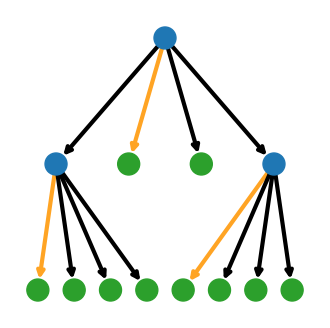

In [94]:
from mlrl.utils.plot_search_tree import plot_tree

meta_env.reset()
meta_env.step(1)
meta_env.step(2)
meta_env.step(5)

node_size = 250
edge_width = 3
figsize = (4, 4)
plot_tree(meta_env.search_tree_policy.tree, meta_env.search_tree_policy, figsize=figsize, zoom=1, node_label_threshold=0, show=False,
          edge_width=edge_width, small_node_size=node_size, arrowstyle='->', title=None)
plt.savefig('figures/tree1.pdf', bbox_inches='tight')
plt.show();

In [95]:
meta_env.search_tree_policy

Greedy Policy Trajectory: LEFT

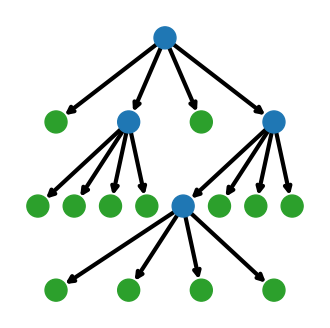

In [98]:
from mlrl.utils.plot_search_tree import plot_tree

meta_env.reset()
meta_env.step(1);
meta_env.step(3);
meta_env.step(5);
meta_env.step(10);
# meta_env.step(1)
# meta_env.step(2)
# meta_env.step(3)
# meta_env.step(4)
# meta_env.step(5)
# meta_env.step(16)
# meta_env.step(15)
# meta_env.step(12)

plot_tree(meta_env.search_tree_policy.tree, figsize=figsize, zoom=1, node_label_threshold=0, show=False,
          edge_width=edge_width, small_node_size=node_size, arrowstyle='->', title=None)
plt.savefig('figures/tree2.pdf', bbox_inches='tight')
plt.show();

In [33]:
from mlrl.utils.plot_search_tree import plot_tree


def show_interesting_traj(*args, **kwargs):
    traj = meta_env.search_tree_policy.get_trajectory()
    if len(traj) < 5:
        return False

    def show():
        plt.imshow(meta_env.tree_policy_renderer(meta_env.object_env,
                                                 meta_env.search_tree_policy))
        plt.axis('off')
        plt.show();
        plot_tree(meta_env.tree, figsize=(7, 7))
        plt.show();

    print('Showing interesting trajectory')
    show()
    policy_step = policy.action(batched_meta_env.current_time_step())
    batched_meta_env.step(policy_step.action);
    show()

    return not meta_env.done and traj != meta_env.search_tree_policy.get_trajectory()

In [34]:
eval_runner = EvalRunner(
    eval_env=batched_meta_env,
    policy=policy,
    rewrite_rewards=True,
    use_tf_function=False,
    convert_to_eager=False,
    # eval_steps=500,
    stop_eval_condition=show_interesting_traj
    # stop_eval_condition=failed_before_time_out
    # stop_eval_condition=completed_n_episodes
)

Showing interesting trajectory


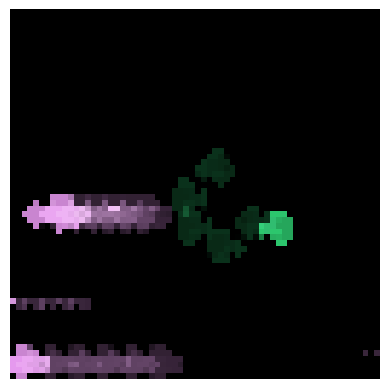

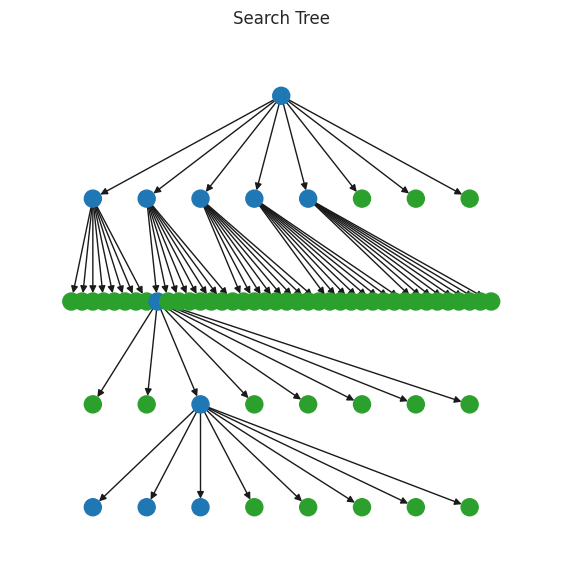

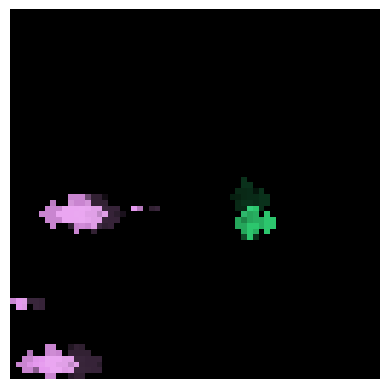

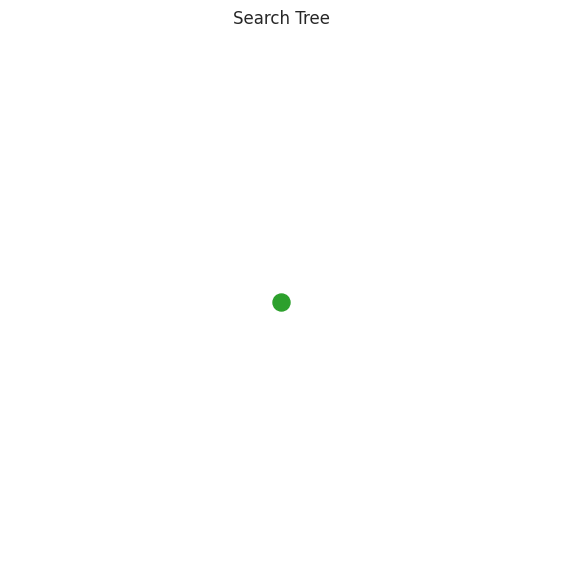

Showing interesting trajectory


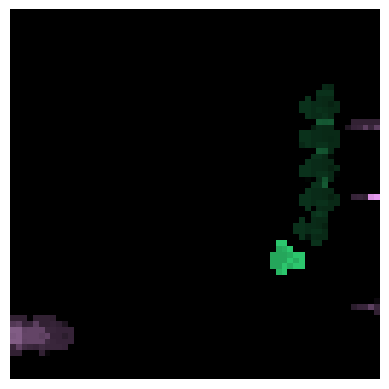

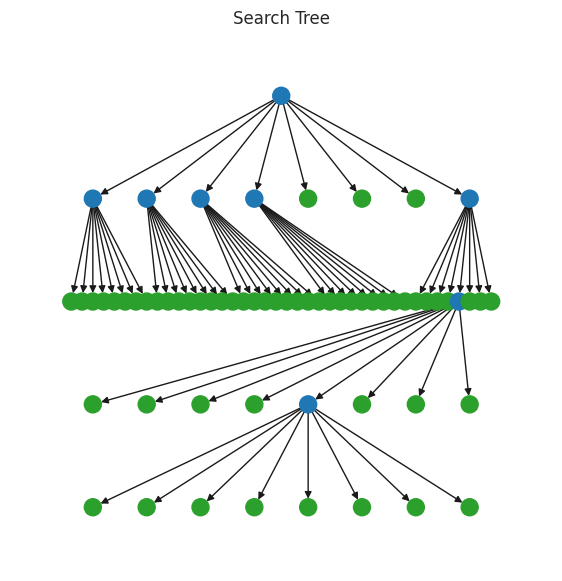

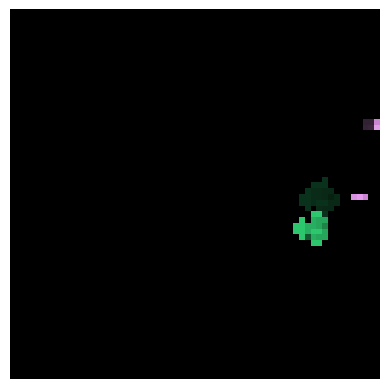

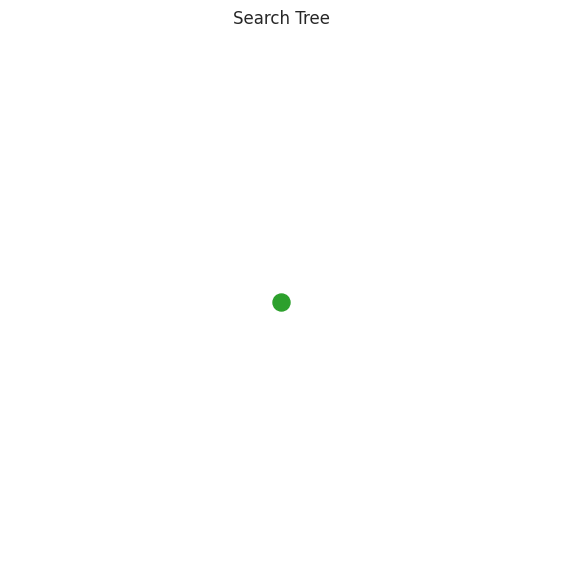

Showing interesting trajectory


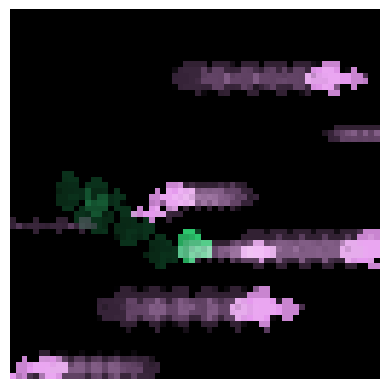

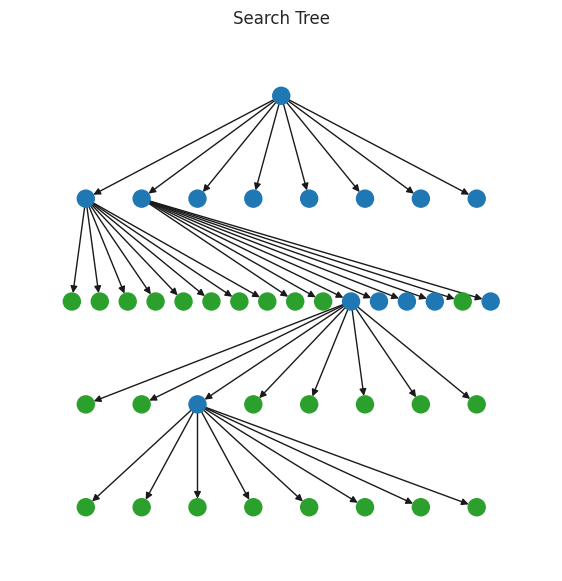

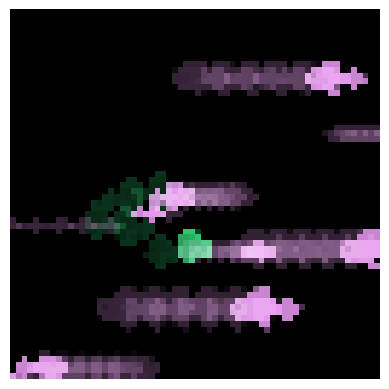

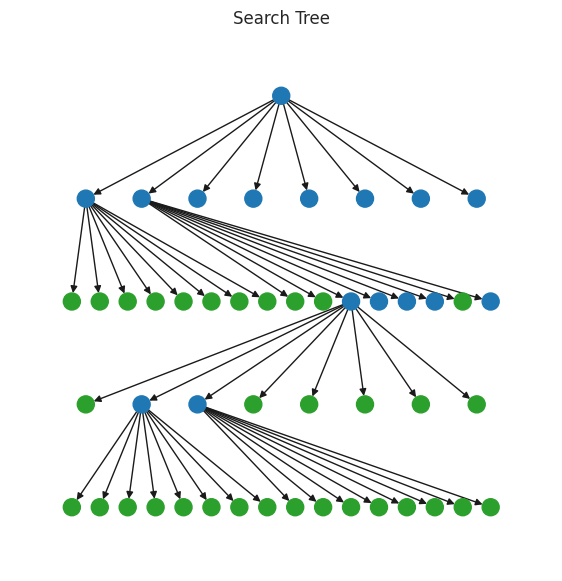

Evaluation stats:
EvalTime: 132.369


In [35]:
reset_object_level_metrics(batched_meta_env)
eval_results = eval_runner.run()
object_level_results = get_object_level_metrics(batched_meta_env)

evaluations = {
    **args,
    **object_config,
    **eval_results,
    **object_level_results
}


In [ ]:
from mlrl.utils.render_utils import save_video, embed_mp4

embed_mp4(save_video(observer.frames[0], fps=1))

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import json
import yaml
from pathlib import Path

%matplotlib inline
sns.set()

2023-05-14 13:55:21.621164: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# episode_stats_df = pd.concat([
#     pd.read_csv(os.path.join(baselines_eval_folder, 'episode_stats.csv')),
#     *[pd.read_csv(os.path.join(folder, 'episode_stats.csv')) for folder in learned_eval_folders]
# ]).reset_index()


episode_stats_df = pd.concat([
    pd.read_csv('outputs/baseline/procgen/bigfish/episode_stats.csv'),
    *[pd.read_csv(p) for p in Path('outputs/eval/procgen/bigfish').glob('episode_stats*')]
]).reset_index()

# for consistent hue order
policy_hue_order = episode_stats_df['Meta-level Policy'].unique()

In [3]:
episode_stats_df.head()

,index,Run ID,Meta-level Policy,Pretrained Percentile,Number of Steps,Return
0,0,NaN,AStar,0.25,29,0.0
1,1,NaN,AStar,0.25,322,54.0
2,2,NaN,AStar,0.25,500,117.0
3,3,NaN,AStar,0.25,500,107.0
4,4,NaN,AStar,0.25,500,111.0


In [4]:
episodes_df = episode_stats_df.copy()
episodes_df = episodes_df[episodes_df['Meta-level Policy'] != 'Random']
episodes_df['Meta-level Policy'] = episodes_df['Meta-level Policy'].apply(lambda x: 'Random' if 'Random' in x else x)
means_df = episodes_df.groupby(['Meta-level Policy', 'Pretrained Percentile']).mean().reset_index()
means_df

,Meta-level Policy,Pretrained Percentile,index,Number of Steps,Return
0,AStar,0.10,595.500000,470.916667,96.916667
1,AStar,0.25,8.000000,461.823529,97.235294
2,AStar,0.50,503.500000,488.125000,102.666667
3,AStar,0.75,527.500000,485.958333,113.250000
4,AStar,0.90,428.500000,500.000000,116.541667
5,Instant Terminate,0.10,573.500000,64.850000,6.400000
6,Instant Terminate,0.25,66.500000,136.040000,16.240000
7,Instant Terminate,0.50,166.500000,184.230000,20.450000
8,Instant Terminate,0.75,266.500000,227.230000,28.790000
9,Instant Terminate,0.90,366.500000,230.400000,35.980000


In [35]:
get_policy_labels()

{'Instant Terminate': '$\\hat{Q}^*$',
 'Random (No Terminate)': 'Random',
 'AStar': '$A^*$',
 'Learned Meta-Policy': 'RLTS',
 'RLTS-ablate-struc': 'No Structural\nFeatures',
 'RLTS-ablate-state': 'No State\nFeatures',
 'RLTS-ablate-rewards': 'Meta-Reward\nAblation',
 'RLTS-no-ablation': 'No Ablations'}

In [33]:
episodes_df['Meta-level Policy'].unique()

array(['$\\hat{Q}^*$', 'Random', '$A^*$', 'RLTS'], dtype=object)

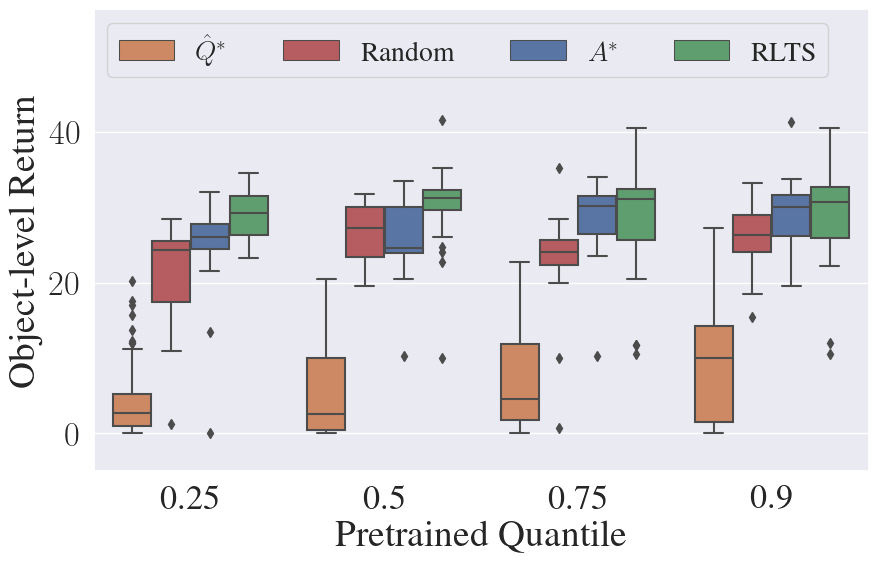

reformatted figures/bigfish-quantiles-boxplot/code.py

All done! ✨ 🍰 ✨
1 file reformatted.


In [75]:
# sns.set(font_scale=1)
# sns.set()
# sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
# plt.rcParams.update({
#     'font.family':'serif',
#     "text.usetex": True,
#     # 'font.size': 20,
#     # 'axes.labelsize': 18, 'axes.titlesize': 20, 
#     'savefig.facecolor': 'white',
# })

# # Set the default text font size
# plt.rc('font', size=16)
# # Set the axes title font size
# plt.rc('axes', titlesize=16)
# # Set the axes labels font size
# plt.rc('axes', labelsize=16)
# # Set the font size for x tick labels
# plt.rc('xtick', labelsize=16)
# # Set the font size for y tick labels
# plt.rc('ytick', labelsize=16)
# # Set the legend font size
# plt.rc('legend', fontsize=18)
# # Set the font size of the figure title
# plt.rc('figure', titlesize=20)


def create_obj_level_return_by_percentile_fig(episodes_df):

    set_plotting_style(font_scale=2.25)

    plt.figure(figsize=(10, 6))

    pallete = sns.color_palette()
    policy_pallete = [pallete[1], pallete[3], pallete[0], pallete[2]]

    policy_labels = {
        k: v for k, v in get_policy_labels().items()
        if v in episodes_df['Meta-level Policy'].unique()
    }
    ax = sns.boxplot(data=episodes_df, x='Pretrained Percentile',
                     y='Return', hue='Meta-level Policy',
                    hue_order=policy_labels.values(),
                    palette=policy_pallete)

    plt.ylabel('Object-level Return')
    plt.xlabel('Pretrained Quantile')

    ax.legend(ncols=4, loc='upper left', fontsize=20)
    ax.set_ylim([-5, 225 / 4])

# # data at figures/data/bigfish/meta-policies-object-level-return.csv
# plt.savefig("figures/bigfish-quantiles-boxplot.pdf", bbox_inches="tight")
# plt.show()

from reproducible_figures import save_reproducible_figure

episodes_df = get_bigfish_df(all_quantiles=True)
episodes_df = episodes_df[episodes_df['Pretrained Percentile'] != 0.1]

save_reproducible_figure(
    'bigfish-quantiles-boxplot',
    episodes_df,
    create_obj_level_return_by_percentile_fig,
    show=True,
)

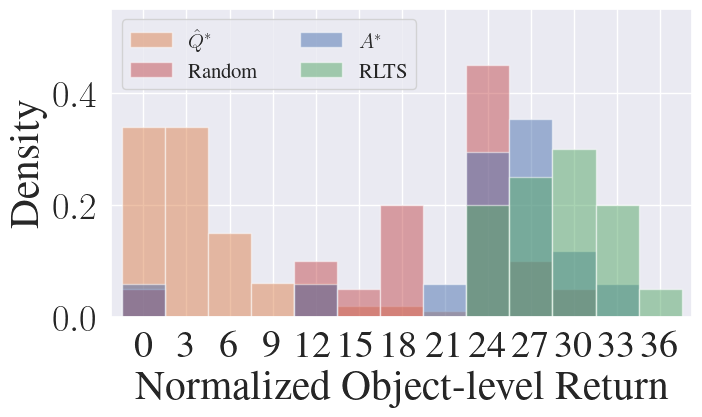

In [41]:
percentile = 0.25

# sns.set(font_scale=2.5)
# sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
plt.rcParams.update({
    'font.family':'serif',
    "text.usetex": True,
    # 'font.size': 20
})

# plt.figure(figsize=(15/2, 8/2))

# episodes_df = episode_stats_df.copy()
# episodes_df = episodes_df[episodes_df['Meta-level Policy'] != 'Random']
# episodes_df = episodes_df[episodes_df['Pretrained Percentile'] != 0.1]

# policy_labels = {
#     'Instant Terminate': '$\hat{Q}^*$',
#     'Random (No Terminate)': 'Random',
#     'AStar': '$A^*$',
#     'Learned Meta-Policy': 'RLTS'
# }
# episodes_df['Meta-level Policy'] = episodes_df['Meta-level Policy'].apply(policy_labels.get)

episodes_df = get_bigfish_df(all_quantiles=True)
episodes_df = episodes_df[episodes_df['Pretrained Percentile'] != 0.1]

episodes_df.sort_values(by='Meta-level Policy', inplace=True)

n = 3
def round_return(x):
    return round(x / n) * n


episodes_df['Rounded Return'] = episodes_df['Return'].apply(round_return)
counts_df = episodes_df.groupby(['Meta-level Policy', 'Pretrained Percentile', 'Rounded Return']).count().reset_index()
counts_df.rename(columns={'Return': 'Count'}, inplace=True)
counts_df.drop(columns=['index', 'Number of Steps'], inplace=True)

total_episodes = episodes_df.groupby(['Meta-level Policy', 'Pretrained Percentile']).count().reset_index()
total_episodes.rename(columns={'index': 'Count'}, inplace=True)
total_episodes = total_episodes[['Meta-level Policy', 'Pretrained Percentile', 'Count']]


def normalize_counts(row):
    index, data = row
    right_policy = total_episodes['Meta-level Policy'] == data['Meta-level Policy']
    right_percentile = total_episodes['Pretrained Percentile'] == data['Pretrained Percentile']
    n = total_episodes[right_policy & right_percentile]['Count'].values[0]
    data['Density'] = data['Count'] / n
    return data

counts_df = pd.DataFrame(map(normalize_counts, counts_df.iterrows()))


fig, ax = plt.subplots(figsize=(15/2, 8/2))
# for policy in episodes_df['Meta-level Policy'].unique():
#     right_policy = episodes_df['Meta-level Policy'] == policy
#     sns.kdeplot(episodes_df[right_percentile & right_policy]['Return'], label=policy, ax=ax)
df = counts_df[counts_df['Pretrained Percentile'] == percentile]
df['Return Interval'] = df['Rounded Return'].apply(lambda x: f'[{x}, {x + n})')
df.sort_values(by=['Rounded Return', 'Meta-level Policy'], inplace=True)
# df.set_index('Rounded Return', inplace=True)
# df = df[['Meta-level Policy', 'Density']]
# sns.barplot(data=df, x='Return Interval', y='Density', hue='Meta-level Policy', ax=ax, hue_order=policy_hue_order)
df = df.pivot(index='Rounded Return', columns='Meta-level Policy', values='Density').fillna(0)
pallete = sns.color_palette()
policy_pallete = [pallete[1], pallete[3], pallete[0], pallete[2]]
df = df[policy_labels.values()]

# df.index = df.index / df.index.max()

for policy, colour in zip(df.columns, policy_pallete):
    df[policy].plot.bar(ax=ax, color=colour, alpha=0.5, width=1, rot=0)
# ax.set_title(f'Pretrained Percentile: {percentile}')
# ax.set_xlim([0, 80])

ax.set_xlabel('Normalized Object-level Return')
ax.set_ylabel('Density')
# ax.legend(loc='upper left', fontsize=15)
# ax.legend(fontsize=15, bbox_to_anchor=(.6, .5))
ax.legend(fontsize=15, ncol=2)
ax.set_ylim([0, 0.55])
# from matplotlib.ticker import StrMethodFormatter
# plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))

# data at figures/data/bigfish/meta-policies-return-distributions.csv
plt.savefig('figures/return-distributions-025-normalized.pdf', bbox_inches='tight')

plt.show()

<Figure size 1200x800 with 0 Axes>

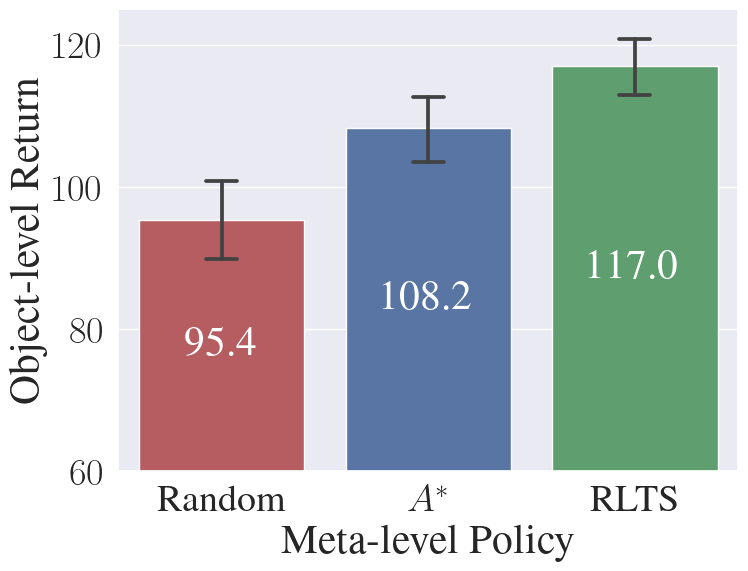

reformatted figures/bigfish-meta-level-return-barplot/code.py

All done! ✨ 🍰 ✨
1 file reformatted.


In [53]:
sns.set(font_scale=2.5)
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

plt.figure(figsize=(12, 8))

episode_stats_df = pd.concat([
    pd.read_csv('outputs/baseline/procgen/bigfish/episode_stats.csv'),
    *[pd.read_csv(p) for p in Path('outputs/eval/procgen/bigfish').glob('episode_stats*')]
]).reset_index()

episodes_df = episode_stats_df.copy()
episodes_df = episodes_df[~episodes_df['Meta-level Policy'].isin(['Random', 'Instant Terminate'])]
episodes_df = episodes_df[episodes_df['Pretrained Percentile'] != 0.1]

policy_labels = {
    'Instant Terminate': '$\hat{Q}^*$',
    'Random (No Terminate)': 'Random',
    'AStar': '$A^*$',
    'Learned Meta-Policy': 'RLTS'
}
episodes_df['Meta-level Policy'] = episodes_df['Meta-level Policy'].apply(policy_labels.get)

means_df = episodes_df.groupby(['Meta-level Policy', 'Pretrained Percentile']).mean().reset_index()
# episodes_df = episodes_df[episodes_df['Pretrained Percentile'] != 0.1]

policy_order = {policy: i for i, policy in enumerate(policy_labels.values())}

episodes_df.sort_values(by='Meta-level Policy', inplace=True, 
                        key=lambda x: x.map(policy_order))


def create_mean_meta_level_return_fig(episodes_df):

    set_plotting_style(font_scale=2.5)

    pallete = sns.color_palette()
    policy_pallete = [pallete[3], pallete[0], pallete[2]]

    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=episodes_df, x='Meta-level Policy', y='Return',
                     capsize=0.15,
                     palette=policy_pallete)
    ax.bar_label(ax.containers[0], fmt='%.1f', label_type='center', color='white')

    # ax.bar_label(ax.containers[0], labels=action_labels,
    #             label_type='center', rotation=90, color='white')

    plt.ylabel('Object-level Return')
    # ax.set_xticklabels(['Random', 'AStar', 'Learned\nMeta-Policy'])
    ax.set_ylim([60, 125])


from reproducible_figures import save_reproducible_figure

save_reproducible_figure(
    'bigfish-meta-level-return-barplot',
    episodes_df,
    create_mean_meta_level_return_fig,
    show=True,
)

In [45]:
episodes_df[(episodes_df['Meta-level Policy'] == 'Learned Meta-Policy') & (episodes_df['Pretrained Percentile'] == 0.75)].head()

,index,Run ID,Meta-level Policy,Pretrained Percentile,Number of Steps,Return
727,0,guher2s1/devoted-frost-278,Learned Meta-Policy,0.75,500,126.0
728,1,guher2s1/devoted-frost-278,Learned Meta-Policy,0.75,500,113.0
729,2,guher2s1/devoted-frost-278,Learned Meta-Policy,0.75,500,137.0
730,3,guher2s1/devoted-frost-278,Learned Meta-Policy,0.75,500,121.0
731,4,guher2s1/devoted-frost-278,Learned Meta-Policy,0.75,500,111.0


In [60]:
results_df.columns

Index(['index', 'Run ID', 'Meta-level Policy', 'Pretrained Percentile',
       'Number of Steps', 'Return', 'gpus', 'pretrained_runs_folder',
       'pretrained_run', 'max_tree_size', 'n_envs', 'n_episodes', 'max_steps',
       'no_video', 'video_fps', 'video_steps', 'Normalized Return',
       'Environment'],
      dtype='object')

<Figure size 750x400 with 0 Axes>

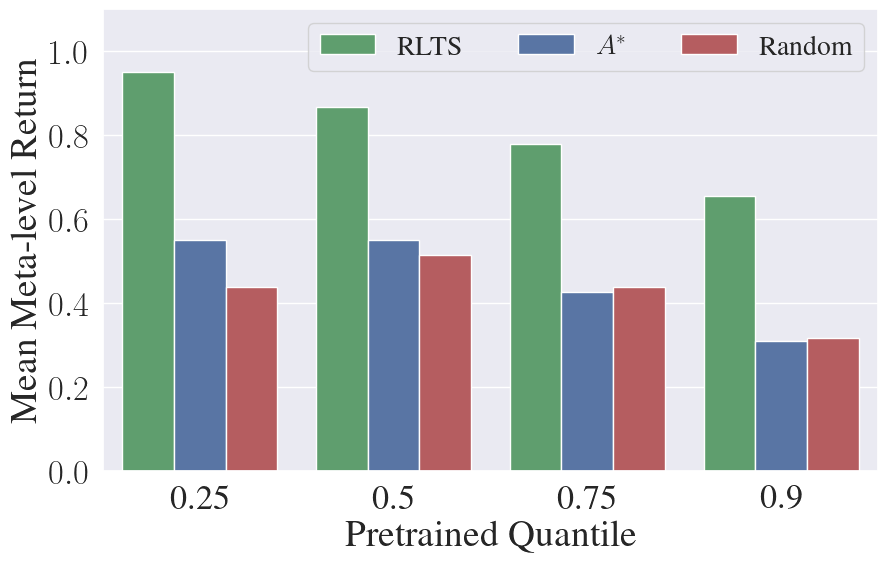

reformatted figures/bigfish-meta-level-return-barplot/code.py

All done! ✨ 🍰 ✨
1 file reformatted.


In [76]:
baselines_eval_folder = 'outputs/baseline/procgen/52-55-04-01-05-2023-complete'
learned_eval_folders = [
    'outputs/eval/procgen/uncategorised/41-09-18-02-05-2023',
    'outputs/eval/procgen/uncategorised/31-29-12-03-05-2023',
    # 'outputs/eval/procgen/54-17-22-09-05-2023' # 0.1
]

results_df = pd.concat([
    pd.read_csv(os.path.join(baselines_eval_folder, 'results.csv')),
    # pd.read_csv(os.path.join(baselines_eval_folder, 'results01.csv')),
    # pd.read_csv(os.path.join(baselines_eval_folder, 'results01-2.csv')),
    pd.read_csv(os.path.join(learned_eval_folders[0], 'results2.csv')),
    *[pd.read_csv(os.path.join(folder, 'results.csv')) for folder in learned_eval_folders]
]).reset_index()

# results_df = get_bigfish_df(all_quantiles=True)


plt.rcParams.update({
    'font.family':'serif',
    "text.usetex": True,
    # 'font.size': 20,
    # 'axes.labelsize': 18, 'axes.titlesize': 20, 
    'savefig.facecolor': 'white',
})

# Set the default text font size
plt.rc('font', size=16)
# Set the axes title font size
plt.rc('axes', titlesize=16)
# Set the axes labels font size
plt.rc('axes', labelsize=16)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=16)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=16)
# Set the legend font size
plt.rc('legend', fontsize=18)
# Set the font size of the figure title
plt.rc('figure', titlesize=20)

plot_name, plot_key = 'Mean Meta-level Return', 'EvalRewrittenAverageReturn'

# plt.figure(figsize=(16 / 2, 9 / 2))
plt.figure(figsize=(15/2, 8/2))

means_df = results_df.groupby(['Meta-level Policy', 'pretrained_percentile']).mean().reset_index()
means_df = means_df[~means_df['Meta-level Policy'].isin(['Random', 'Instant Terminate'])]

def create_mean_meta_level_return_fig(means_df):
    policy_labels = {
        'Instant Terminate': '$\hat{Q}^*$',
        'Random (No Terminate)': 'Random',
        'AStar': '$A^*$',
        'Learned Meta-Policy': 'RLTS'
    }
    means_df['Meta-level Policy'] = means_df['Meta-level Policy'].apply(policy_labels.get)

    means_df.sort_values(by='Meta-level Policy', inplace=True)

    # sns.lineplot(data=means_df, x='pretrained_percentile', y=plot_key, hue='Meta-level Policy', alpha=0.25)
    # ax = sns.scatterplot(data=means_df, x='pretrained_percentile', y=plot_key, hue='Meta-level Policy', legend=False)

    set_plotting_style(font_scale=2.25)
    plt.figure(figsize=(10, 6))
    pallete = sns.color_palette()
    policy_pallete = [pallete[3], pallete[0], pallete[2]][::-1]


    policy_order = {policy: i for i, policy in enumerate(policy_labels.values())}

    means_df.sort_values(by='Meta-level Policy', inplace=True, 
                            key=lambda x: -x.map(policy_order))

    ax = sns.barplot(data=means_df, x='pretrained_percentile', y=plot_key, hue='Meta-level Policy', palette=policy_pallete)

    # ax.legend(loc='upper center', bbox_to_anchor=(.5, -.15),
    #           ncol=3, fancybox=False, shadow=False)
    ax.legend(ncols=3, fontsize=20)
    ax.set_ylim([0, 1.1])

    plt.xlabel('Pretrained Quantile')
    plt.ylabel(plot_name)
# plt.title(f'{plot_name} vs Pretrained Percentile')

# means_df.to_csv('figures/data/bigfish/meta-policies-mean-meta-level-return.csv')
# plt.savefig("figures/meta-policies-mean-meta-level-return.pdf", bbox_inches="tight")

from reproducible_figures import save_reproducible_figure

save_reproducible_figure(
    'bigfish-meta-level-return-barplot',
    means_df,
    create_mean_meta_level_return_fig,
    show=True,
)

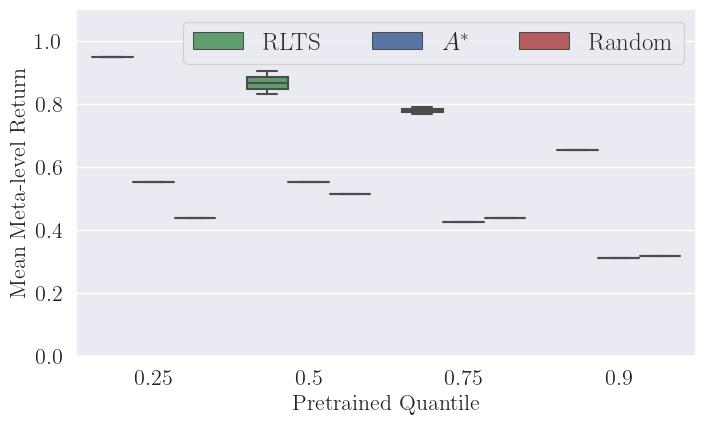

In [149]:
baselines_eval_folder = 'outputs/baseline/procgen/52-55-04-01-05-2023-complete'
learned_eval_folders = [
    'outputs/eval/procgen/41-09-18-02-05-2023',
    'outputs/eval/procgen/31-29-12-03-05-2023',
    # 'outputs/eval/procgen/54-17-22-09-05-2023' # 0.1
]

results_df = pd.concat([
    pd.read_csv(os.path.join(baselines_eval_folder, 'results.csv')),
    # pd.read_csv(os.path.join(baselines_eval_folder, 'results01.csv')),
    # pd.read_csv(os.path.join(baselines_eval_folder, 'results01-2.csv')),
    pd.read_csv(os.path.join(learned_eval_folders[0], 'results2.csv')),
    *[pd.read_csv(os.path.join(folder, 'results.csv')) for folder in learned_eval_folders]
]).reset_index()


plt.rcParams.update({
    'font.family':'serif',
    "text.usetex": True,
    # 'font.size': 20,
    # 'axes.labelsize': 18, 'axes.titlesize': 20, 
    'savefig.facecolor': 'white',
})

# Set the default text font size
plt.rc('font', size=16)
# Set the axes title font size
plt.rc('axes', titlesize=16)
# Set the axes labels font size
plt.rc('axes', labelsize=16)
# Set the font size for x tick labels
plt.rc('xtick', labelsize=16)
# Set the font size for y tick labels
plt.rc('ytick', labelsize=16)
# Set the legend font size
plt.rc('legend', fontsize=18)
# Set the font size of the figure title
plt.rc('figure', titlesize=20)


plot_name, plot_key = 'Mean Meta-level Return', 'EvalRewrittenAverageReturn'

plt.figure(figsize=(16 / 2, 9 / 2))

means_df = results_df.copy() #.groupby(['Meta-level Policy', 'pretrained_percentile']).mean().reset_index()
means_df = means_df[~means_df['Meta-level Policy'].isin(['Random', 'Instant Terminate'])]


policy_labels = {
    'Instant Terminate': '$\hat{Q}^*$',
    'Random (No Terminate)': 'Random',
    'AStar': '$A^*$',
    'Learned Meta-Policy': 'RLTS'
}
means_df['Meta-level Policy'] = means_df['Meta-level Policy'].apply(policy_labels.get)

means_df.sort_values(by='Meta-level Policy', inplace=True)

# sns.lineplot(data=means_df, x='pretrained_percentile', y=plot_key, hue='Meta-level Policy', alpha=0.25)
# ax = sns.scatterplot(data=means_df, x='pretrained_percentile', y=plot_key, hue='Meta-level Policy', legend=False)

pallete = sns.color_palette()
policy_pallete = [pallete[3], pallete[0], pallete[2]][::-1]


policy_order = {policy: i for i, policy in enumerate(policy_labels.values())}

means_df.sort_values(by='Meta-level Policy', inplace=True, 
                        key=lambda x: -x.map(policy_order))

ax = sns.boxplot(data=means_df, x='pretrained_percentile', y=plot_key, hue='Meta-level Policy', palette=policy_pallete)

# ax.legend(loc='upper center', bbox_to_anchor=(.5, -.15),
#           ncol=3, fancybox=False, shadow=False)
ax.legend(ncols=3)
ax.set_ylim([0, 1.1])

plt.xlabel('Pretrained Quantile')
plt.ylabel(plot_name)
# plt.title(f'{plot_name} vs Pretrained Percentile')

# means_df.to_csv('figures/data/bigfish/meta-policies-mean-meta-level-return.csv')
plt.savefig("figures/bigfish-quantiles-meta-return-boxplot.pdf", bbox_inches="tight")


In [1]:
from mlrl.experiments.eval_procgen_meta_policies import load_best_meta_policy
from mlrl.utils.wandb_utils import get_wandb_info_from_run_dir
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow as tf

/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


pygame 2.1.3 (SDL 2.0.22, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html
Using TensorFlow 2.12.0


In [4]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0,1,2,3,4,5,6'

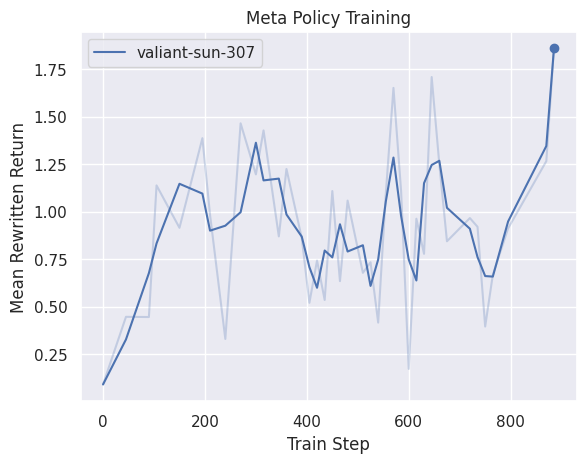

In [4]:
meta_run = 'outputs/runs/ppo_run_52-06-02-13-05-2023/'

run_info = get_wandb_info_from_run_dir(meta_run)
object_config = run_info['config']['object_level_config']

load_best_meta_policy(run_info)
plt.show()

In [5]:
from mlrl.experiments.procgen_meta import load_pretrained_q_network

object_config = load_pretrained_q_network(
    'runs', 'run-16839105526160484',
    percentile=1.0
)

Object-level config:
	 - action_repeats: 4
	 - agent_name: categorical_dqn_agent
	 - collect_steps_per_iteration: 2
	 - discount: 0.999
	 - env: bossfight
	 - epsilon: 0.1
	 - epsilon_decay_steps: 250000
	 - epsilon_schedule: False
	 - eval_steps: 1000
	 - experience_batch_size: 512
	 - final_epsilon: 0.1
	 - frame_stack: 0
	 - grayscale: False
	 - initial_collect_steps: 500
	 - initial_epsilon: 1.0
	 - learning_rate: 0.00025
	 - max_epochs: 500
	 - metrics: []
	 - model_config: N/A
	 - n_collect_envs: 256
	 - n_eval_envs: 64
	 - n_video_envs: 12
	 - name: run
	 - optimiser_config: {'amsgrad': False, 'beta_1': 0.9, 'beta_2': 0.999, 'clipnorm': 'N/A', 'clipvalue': 'N/A', 'ema_momentum': 0.99, 'ema_overwrite_frequency': 'N/A', 'epsilon': 1e-07, 'global_clipnorm': 'N/A', 'is_legacy_optimizer': False, 'jit_compile': True, 'learning_rate': 0.0002500000118743628, 'name': 'Adam', 'use_ema': False, 'weight_decay': 'N/A'}
	 - procgen_env_name: bossfight
	 - replay_buffer_capacity: 16384
	 - run

In [6]:
from mlrl.procgen.procgen_state import ProcgenProcessing

In [7]:
from mlrl.experiments.procgen_meta import make_gym_procgen
object_env = make_gym_procgen(object_config)

In [8]:
obs = object_env.reset()
_, q_vals = ProcgenProcessing.call(np.expand_dims(obs, 0))
q_vals.argmax()

2

In [22]:
from mlrl.procgen.procgen_state import ProcgenState
from procgen.env import ProcgenGym3Env
combo_strings = ['+'.join(combo) for combo in ProcgenGym3Env.get_combos(None)]

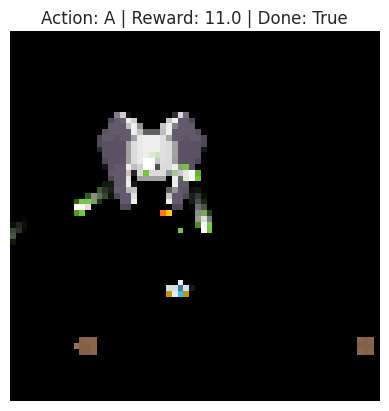

In [28]:
import IPython.display as display

obs = object_env.reset()
done = False
try:
    while not done:
        _, q_vals = ProcgenProcessing.call(np.expand_dims(obs, 0))
        action = q_vals.argmax()
        obs, reward, done, info = object_env.step(action)
        plt.imshow(obs)
        plt.axis('off')
        plt.title(f'Action: {combo_strings[action]} | Reward: {reward} | Done: {done}')
        plt.show()
        display.clear_output(wait=True)
except KeyboardInterrupt:
    pass

In [29]:
from mlrl.procgen.procgen_env import make_vectorised_procgen
vec_object_env = make_vectorised_procgen(object_config, n_envs=1)

In [30]:
agent = ProcgenProcessing.get_agent()
ts = vec_object_env.current_time_step()
policy_step = agent.policy.action(ts)
ts = vec_object_env.step(policy_step.action)

In [31]:
r, obs, done = object_env.env.observe()

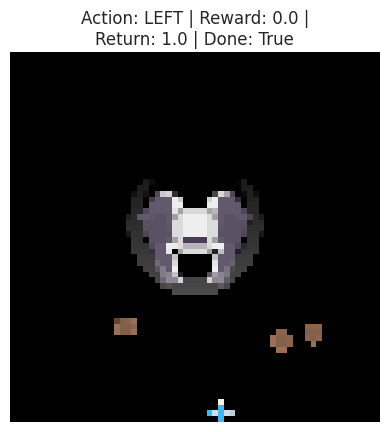

In [54]:
import IPython.display as display

agent = ProcgenProcessing.get_agent()
try:
    done = False
    return_val = 0
    while not done:
        ts = vec_object_env.current_time_step()
        policy_step = agent.policy.action(ts)
        ts = vec_object_env.step(policy_step.action)

        
        obs = ts.observation[0]
        reward = ts.reward[0]
        return_val += reward
        done = ts.is_last()[0]
        action = policy_step.action[0]

        plt.imshow(obs)
        plt.axis('off')
        plt.title(f'Action: {combo_strings[action]} | Reward: {reward} |\nReturn: {return_val} | Done: {done}')
        plt.show()
        display.clear_output(wait=True)

except KeyboardInterrupt:
    pass